## Final Project Submission

Please fill out:
* Student name: Ryan Beck
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


**Project Objective:** Clean, explore, and model this the Kings County Data Set with a multivariate linear regression to predict the sale price of houses as accurately as possible.

Project Outline/Workplan:
1. Business Case and Research Questions
2. Import Data and Format
    * Set up environment
    * Import data as dataframe
    * Learn basic shape and features of data
3. Data Cleaning
    * Identify and deal with duplicates
    * Identify and deal with missing data
    * Identify and deal with inconsitent data
4. Data Exploration
    * Create initial visualizations to better understand data
        * Histograms - Scatter plots - Box plots
        *  Deal with categorical variables: dummies, bin, or drop
5. Feature Engineering
    * Select important features and construct more meaningful ones from raw data
        * Check for multicolinearity
        * Normalize and scale features where necessary
6. Develop Model
    * Fit model
7. Conclusions

## Business Case and Research Questions 

When making investment decisions in the real estate market it is important to know the drivers of market value. This is important not only when making a current purchase, but perhaps more importantly for when an individual investor or firm budgets for future purchases. How can we know what to expect to spend as properties come on the market, so that we will be adequately prepared to move when the time is right? 

One method to answer this question is through regression analysis. Using knowledge of previous home sale prices, we can analyze data to determine what factors have the most signifcant impact on final sale price. In this research we will answer:  

1. What factors contribute to predicted housing price most significantly? 
2. Given available data, to what degree of confidence can we predict housing prices? 

## Our Data

In [1]:
#Setting up environment with initial libraries needed for importing, cleaning, and initial visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

# Read the King's County dataframe with Pandas and assign it to the variable df
df = pd.read_csv('kc_house_data.csv')
# Make sure everytingh has been imported correctly and get a first look at the top five rows of data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# Print a summary of the dataframe and make initial observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


**Initial Observations:** 
* The dataframe is 21 columns wide and has 21,597 entries 
* 'waterfront', 'yr_renovated', and 'view' appear to be missing values
* 'sqft_basement' is oddly coded as an object
* 'date' is also an object - I'm not sure if this is normal and will look further into it when cleaning the data

## Data Cleaning

### Duplicate Entries

As a first step to cleaning the data we'll check to see how may duplicate entries may exist. This is a good first step because it may reduce the total number of entries that may need to be cleaned, which implies that dropping may be easier for columns with low numbers of missing or inconsistent values.

In [3]:
# Select duplicate rows except first occurrence based on all columns
duplicate_rows = df[df.duplicated()]
print(f"The are {len(duplicate_rows)} duplicate rows")

The are 0 duplicate rows


Great! There are no rows that are completely dublicated. But there may still be duplicate values to know about, so let's check to see if 'id' has any duplicates. 

In [4]:
# Select duplicate values of 'id' except first occurrence 
duplicate_id = df[df.duplicated('id')]
print(f'There are {len(duplicate_id)} duplicate values of id, ' 
      f'which represent {round(len(duplicate_id)/len(df),3)}% of all entries.')

There are 177 duplicate values of id, which represent 0.008% of all entries.


This is interesting, but not necessarily a problem. It may mean that homes with the same 'id' have been sold multiple times, since the 'id' is duplicated, but entire rows are not. Additionally, as 'id' could be an index, but likely not a predictor that will be used later in our model, we can keep these duplicate values in for now and keep an eye on them later if they do present problems.

### Missing data

Next, we can look at the three columns of data we noticed earlier had missing values: 'waterfront', 'yr_renovated', and 'view'. First, let's get a count of how many missing values there are in the data set and make sure we didn't miss any earlier

In [5]:
#Count the number of missing values for all columns in the data and return the name
# and count of those that do
for col in df:
    v = df[col].isna().sum()
    if v > 0:
        print(f'{col} has {v} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


It looks like these are the only three with missing values. Let's get an idea of what percentage of the data the missing values represent.

In [6]:
# divide the missing value count by the total length of the data set
for v in (['waterfront', 'view', 'yr_renovated']):
    print(f'{v} is missing {round(df[v].isna().sum()/len(df)*100,3)}% of its values')

waterfront is missing 11.002% of its values
view is missing 0.292% of its values
yr_renovated is missing 17.79% of its values


Lets explore each of these one-by-one, starting with 'view'. 

'view' is only missing values for .29% of all entries, which means we can likely drop those rows without losing much fidelity in our data. Let's take a deeper look at 'view' to learn more about it first. 

In [7]:
#check the total number of unique values of 'view'
display(df.view.nunique())
df.view.unique()

5

array([ 0., nan,  3.,  4.,  2.,  1.])

There are only 5 unique values of 'view' which means it is a categorical variable. Let's see how those values are distributed.

In [8]:
df.view.value_counts(normalize=True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

With the value 0.0 accounting ~90% of values for 'view' we are presented with a choice. We could reassign the 63 missing values to 0.0 and likely be safe, or just drop the rows, as they represent less than a half of a percent of the overall data. In this case we'll drop the rows. 

In [9]:
# drop all rows that have a null value for 'view' and check to see how it has changed our data
df.dropna(axis=0, subset=['view'], inplace=True)
print(f'Are there any null values: {df.view.isna().any()}\n')
df.info()

Are there any null values: False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       19164 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)


We have successffully dropped the 63 entries with null values for 'view', next we will assess 'waterfront'.

We know from our analysis above that there are 2376 missing values for 'waterfront', which represents ~11% of total values. This is a more significant portion of the data, so we do not want to drop it. Our alternatives are to impute the missing data, or to label it 'missing'. Let's learn more about the characteristics of 'waterfront' to decide.

In [10]:
#check the total number of unique values of 'waterfront'
display(df.waterfront.nunique())
df.waterfront.unique()

2

array([nan,  0.,  1.])

It appears that 'waterfront' is also categorical data, and further, it is binary, which may lead to easy imputing based on the distribution of values.

In [11]:
# check to see how the values for 'waterfront' are distributed.
df.waterfront.value_counts(normalize=True)

0.0    0.992434
1.0    0.007566
Name: waterfront, dtype: float64

Over 99% of values for waterfront are 0. We now have another option, we can just assign the missing values to 0, or we can round our values to assign ~99% of missing values to 0, and ~1% to 1. Let's try the latter. 

In [12]:
# Set all the null values in 'waterfront' equal to '?' to make them easier to work with
df['waterfront'].fillna("?", inplace=True)

#establish the weights of the variables to be imputed - based on weight of known values
wf_prob = [0.992434, .007566]
prob = [i/sum(wf_prob) for i in wf_prob]

#create a function to randomly assign the desired values to the null value ('?') by weight of known values
def impute_waterfront(value):
    if value == "?":
        return np.random.choice([0.0, 1.0], p=prob)
    else:
        return value
# apply the function to the dataframe
df.waterfront = df.waterfront.map(lambda x: impute_waterfront(x))

#check to see how the funciton has been applied
print(f'Are there any null values: {df.waterfront.isna().any()}\n')
display(df.info())
df['waterfront'].value_counts(normalize=True)

Are there any null values: False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)


None

0.0    0.992523
1.0    0.007477
Name: waterfront, dtype: float64

Excellent, we now see that the null values for water front have been completely replaced, and the distribution of values remains rougly the same as before. 

Finally we will clean up the null values for 'yr_renovated'. As shown above there are 3842 missing values, representing over 17% of the data. This is too many rows to drop, so we will learn more about 'yr_renovated' to see how we might approach replacing the values. If it turns out that the values are too difficult to impute, we can always drop the column, but as renovations are something that likely have some influence on final price, it would be preferable to keep. 

In [13]:
#check the total number of unique values of 'yr_renovated'
print(f'There are {df.yr_renovated.nunique()} unique values.')
df.yr_renovated.unique()

There are 70 unique values.


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

It turns out there are a lot of diffent values for 'yr_rennovated', including 0. This could mean that a house has never been renovated, but is also problematic because it may also be a placeholder value, and may disrupt getting simple descriptors like mean, median, mode. Let's look further at those. 

count    17704.000000
mean        83.765025
std        400.239690
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

0.0       0.958032
2014.0    0.004123
2003.0    0.001751
2013.0    0.001751
2007.0    0.001695
Name: yr_renovated, dtype: float64

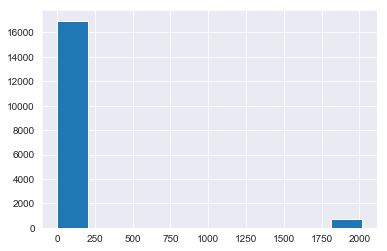

In [14]:
#Determine the mean, median, mode and distribution of values for 'yr_renovated'
display(df['yr_renovated'].describe())
display(df.yr_renovated.hist())
df.yr_renovated.value_counts(normalize=True).head()

95% of the known values for 'yr_renovated' are 0, with all other values representing less than .5% of overall data each. This results in 0 for both median and mode, and a mean value (83.7) which is untenable as a date. Considering this, along with the very wide range of values, it might be wise to drop the column altogether. Alternately, we can create a dummy variable that indicates whether or not a house hase been renovated at all, after replacing the null values with 0 and known values with 1. 

With less than 5% of houses having a renovation accounted for, it is unlikely that this will be a significnat predictor of price. Therefore we will drop the yr_renovated column. 

Note: considering the diminishing returns of renovations, another approach would be to bin the 'yr_renovated' values into more or less recently renovated homes. We can revist later if we find we do not have enough to make decently complex and accurate model. 

In [15]:
# Drop 'yr_renovated'
df.drop(labels=['yr_renovated'], axis=1, inplace=True)

In [16]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639


### Inconsistent Data

Now that we have removed all of the null values, we can check to see if there are any other things we should deal with, like placeholders or extreme outliers, before moving forward. We've already observed that 'sqft_basement' is suspiciously an object. We can check the rest of the values as well before we clean that up. 

In [17]:
# check the central tendencies of all columns for odd distributions
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.007477,0.233863,3.409724,7.657425,1788.557537,1971.002275,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.086145,0.765686,0.650654,1.172643,827.745641,29.376044,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


At this time no values stand out as having abnormal min, max, std, or mean. We'll check for other extraneous values. 

In [18]:
#Check the top five occuring values from each column to see if there are any that stand out
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
5430300171    0.000093
5083000375    0.000093
3395040550    0.000093
5101405604    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006594
6/25/2014    0.006083
6/26/2014    0.006083
7/8/2014     0.005898
4/27/2015    0.005758
Name: date, dtype: float64 


price 
 450000.0    0.007941
350000.0    0.007941
550000.0    0.007384
500000.0    0.007059
425000.0    0.006966
Name: price, dtype: float64 


bedrooms 
 3    0.454676
4    0.318798
2    0.127891
5    0.074115
6    0.012538
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249094
1.00    0.178369
1.75    0.140940
2.25    0.094595
2.00    0.089440
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006408
1400    0.006223
1440    0.006176
1010    0.005991
1800    0.005991
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016578
6000    0.013467
4000    0.011656
7200    0.010216
4800    0.005526
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494242
2.0    0.381304
1.5    

A quick review of all columns shows than none of the top 5 values in any appear to be abnormal, except for 'sqft_basement', which has a placeholder '?' for approximately 2% of it's values. This explains why 'sqft_basement' currently appears as an object. Our options for this include dropping the records with '?', or imputing a value based on central tendencies (mean or median likely). Let's first figure out what those are. 

In [19]:
# isolate the values of 'sqft_basement' that are recorded and convert them to a float so 
# that we can observe traits
new_basement = df[df['sqft_basement'] != '?']
new_basement.sqft_basement.astype('float').describe()

count    21082.000000
mean       291.359975
std        442.007858
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

'sqft_basement' appears to be very skewed, with more than half of values being 0. Nevertheless, it appears we may be able to replace '?' with the average basement value without significantly changing the overall distribution. 

In [20]:
# set mean value
basement_mean = new_basement.sqft_basement.astype('float').mean()

#create a function to assign the desired values to the null value ('?') 
def impute_basement(value):
    if value == "?":
        return basement_mean
    else:
        return value
# apply the function to the dataframe
df.sqft_basement = df.sqft_basement.map(lambda x: impute_basement(x)).astype('float')

#check to see how the function has been applied
display(df.info())
df['sqft_basement'].value_counts(normalize=True).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.5+ MB


None

0.000000      0.594316
291.359975    0.020990
600.000000    0.010031
500.000000    0.009706
700.000000    0.009613
Name: sqft_basement, dtype: float64

In [21]:
#check to see how much central tendencies were affected
df.sqft_basement.describe()

count    21534.000000
mean       291.359975
std        437.344152
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

The std and 75th quartile were slightly affected, but overall appears to be generally unaffected. 

### Adjusting Dates

Now, the last piece to deal with is the date column. It's currently an object, so we won't be able to use that for any analysis. But time of year likely does have some relation to housing prices, as housing markets tend to heat up in the summer. So, to make this more workable data, we can convert the date column to a datatime dtype and and then create two new columns with  day of the year and month values. 

note: a potential predictor could be 'years since last sold' 

In [22]:
# Import datetime and create two new columns for 'day of year' and 'month'
import datetime as dt

df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
# check the values of our new columns
display(df.day_of_year.values,df.month.values)

array([286, 343,  56, ..., 174,  16, 288])

array([10, 12,  2, ...,  6,  1, 10])

In [23]:
# Check dateframe to see that new columns are present
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,286,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,343,12


The two new columns are created and at this point our data appear to be clean. We have:
* Checked for duplicates
* Droped 63 rows with null values for 'view'
* Imputed 2376 missing values for 'waterfront' 
* Dropped the 'yr_renovated' column with it's 3842 missing values
* Imputed missing values for 'sqft_basement' and converted it to a float
* Created two new columns with values for 'day_of_year' and 'month'

Now on to deeper exploration of the data. 

## Data Exploration

In this section we'll take a deeper look at our data and create visuals to learn more about it. We'll deal with categotical variables, use histograms, count/bar charts, box plots, and heatmaps, and we'll check for multicolinearity. Ultimately, we'll close the section out with a selected set of variables to begin buiding our model with.

### Dealing with Categorical Variables 

To begin identifying categorical values we can check to see how many unique values exist for each variable, undserstanding that the lower the number the more likely a value is to be a category. Additionally, there are some we already know to be categoricals based on what we have observed already (e.g. waterfront).

In [24]:
#count the number of unique values for each column in our data
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

id: 21357
date: 371
price: 3613
bedrooms: 12
bathrooms: 29
sqft_living: 1033
sqft_lot: 9760
floors: 6
waterfront: 2
view: 5
condition: 5
grade: 11
sqft_above: 942
sqft_basement: 302
yr_built: 116
zipcode: 70
lat: 5029
long: 750
sqft_living15: 776
sqft_lot15: 8663
day_of_year: 355
month: 12


**Observations:**
Based on these counts (and what we already know) we can make some basic assumptions as to which are likely to be categorical or continuous. 

* _Potential Continuous variables:_
    * price (our dependent variable)
    * sqft_living
    * sqft_lot
    * sqft_above
    * sqft_basement
    * yr_built - will treat this as a continuous variable for now, but will keep and eye on it. It could also be a candidate for potential binning by decade - or turned into a value for age
    * lat
    * long
    * sqft_living15
    * sqft_lot15
* _Potential Categorical variables:_
    * bedrooms
    * bathrooms - there are a large number of unique values here for bathrooms in a house - we'll look into this more
    * floors
    * waterfront
    * view
    * condition
    * grade
    * zipcode
    * day_of_year - although there is a high number of values here we know there are only a limited number a potential values
    * month
* _Other:_
    * id 
    * date 
    
To make sure we have these right we can do quick analysis of the continuous variables by plotting them on a scatter plot and looking for the appropriate cloud shape. We'll dig deeper into each categorical to determine the best couse of action for them. 

But first, we can creat a new dataframe with only the varibles we know we will be working with, and drop the others (id, date). We've created a proxy for date with month and day_of_year, and id is too unique to have predicitve quality in our regression

In [25]:
# create new df without date, id
# begin df2
df2 = df.drop(['id', 'date'], axis=1)
df2.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,286,10
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,343,12


In [26]:
# let's also create lists of our two variable groups for ease of working with them
# day_of_year is our largest categorical variable, we can use it to make our lists

# empty list for holding categorical variable names
cats = []
# empty list for holding continuous variable names
conts = []

# select variable names to put in each list based on the count of the largest known categorical variable
for col in df2.columns:
    if df2[col].nunique() <= 356:
        cats.append(col)
    else:
        conts.append(col)
        
print(cats)
print(conts)

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode', 'day_of_year', 'month']
['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


We have a lot of categorical variables to inspect! Let's take a qiuck look at our continuous variables first to make sure we have them right. 

### Inspecting Continuous Variables

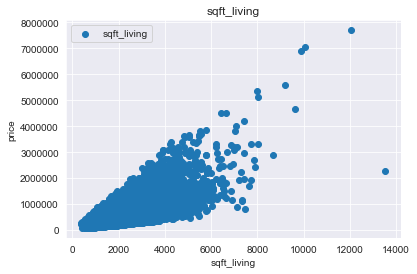

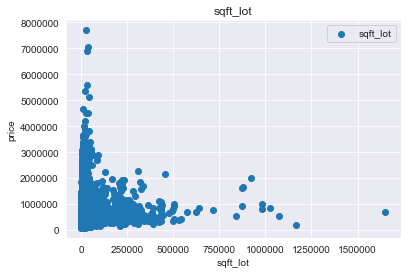

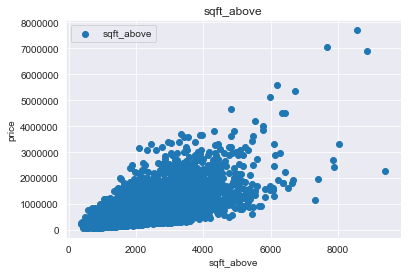

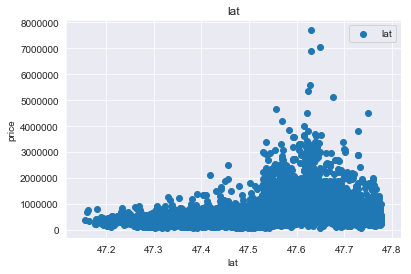

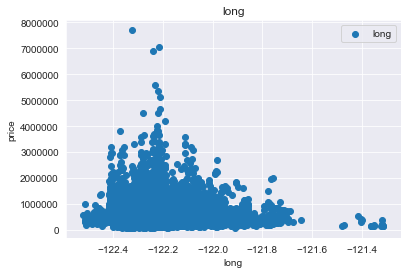

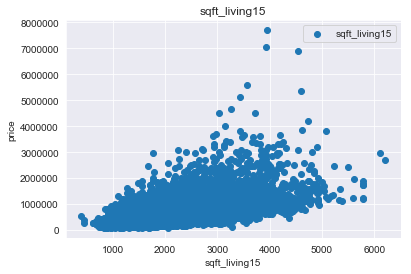

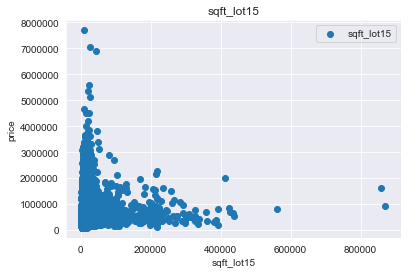

In [27]:
# create a sacatter plot for each continuous variable execpt for price
for col in conts[1:]: 
    plt.scatter(df2[col], df2.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

**Obeservations:** Each varialble appears to be appropriately distributed to be a continous variable. There do appear to be a number of outliers we can deal with. Let's look at central tendencies for these variables and histograms. Other observations include: 
* sqft_living: appears to have a fairly linear relationship with more variation as x increases
* sqft_lot: there is not an obvious linear relationship, and an interesting L-shape, perhaps indicating high value in high density areas as well as larger properties 
* sqft_above: similar to sqft_living
* lat: There may be some linear relationship, but there is definitely more concentration of sales and greater values at greater values of lat, suggesting there could be some relationship
* long: similar to long, we should get a better idea of concentrations of price in another visual
* sqft_living15: similar to other sqft variables, but seems flatter. Will have to check for linear relationship
* sqft_lot15: similar to sqft_lot

### Outlier Analysis

,price,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,2079.827854,1.509060e+04,1788.557537,47.560180,-122.213948,1986.299944,12751.079502
std,3.660596e+05,917.446520,4.138021e+04,827.745641,0.138528,0.140735,685.121001,27255.483308
min,7.800000e+04,370.000000,5.200000e+02,370.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,1430.000000,5.040000e+03,1190.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.617000e+03,1560.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.068775e+04,2210.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,47.777600,-121.315000,6210.000000,871200.000000


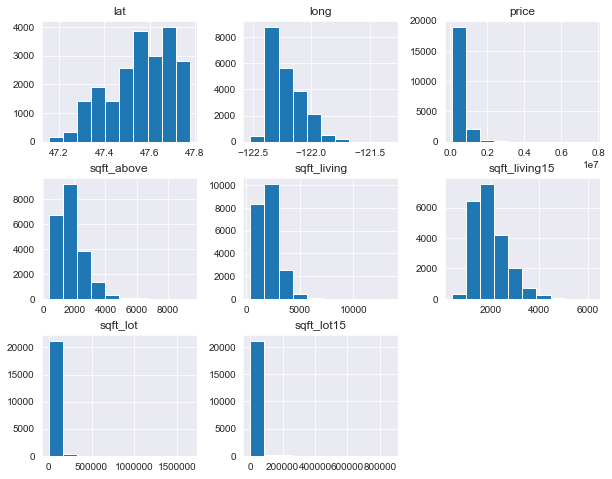

In [28]:
# create a dataframe to work with for the analysis of continuous variables
df_conts = df2.loc[:,conts]
# create histograms for eacr variable 
df_conts.hist(figsize=(10,8))
# check the central tendencies for each variable
df_conts.describe()

Visual inspection of the above shows right skewed distributions for many of our variables, and observing central tendencies tells us that max values are much greater than 3 standard deviations away from the mean for price, sqft_living, sqft_above, sqft_lot, sqft_lot15, and sqft_living15. 

Since much of this skewness may be driven by the same entries, we can remove outliers for one varaible at a time to see how it effects others and avoid overcorrecting. 

In [29]:
# starting with sqft_living, lets count the number of values that are more 8000sqft, which is where we begin to see
# separation in our scatter plot

# set an upper limit for what we consider an outlier
upper_limit = 8000
# see how many entries fit our description of an outlier
outlier_count = df2[df2['sqft_living'] >= upper_limit]
len(outlier_count)

10

10 entries is a relatively low amount, let's remove those entries and see what it does to our distributions

In [30]:
# drop entires with outlier sqft_living values
df_sqft_drop = df2[df2['sqft_living'] < 8000]
df_sqft_drop.sqft_living.describe()

count    21524.000000
mean      2076.284752
std        902.029471
min        370.000000
25%       1426.500000
50%       1910.000000
75%       2550.000000
max       7880.000000
Name: sqft_living, dtype: float64

Median value remsins the same and mean value only slighly decreases from 2079 to 2076. Let's also see how many other varialbes have been affected. 

,price,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15
count,2.152400e+04,21524.000000,2.152400e+04,21524.000000,21524.000000,21524.000000,21524.000000,21524.000000
mean,5.379475e+05,2076.284752,1.506938e+04,1786.025274,47.560144,-122.213946,1985.344871,12734.790931
std,3.508029e+05,902.029471,4.133904e+04,818.990975,0.138547,0.140753,683.761769,27220.672874
min,7.800000e+04,370.000000,5.200000e+02,370.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,1426.500000,5.040000e+03,1190.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.615000e+03,1560.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.066675e+04,2210.000000,47.678100,-122.125000,2360.000000,10080.000000
max,4.500000e+06,7880.000000,1.651359e+06,7880.000000,47.777600,-121.315000,6210.000000,871200.000000


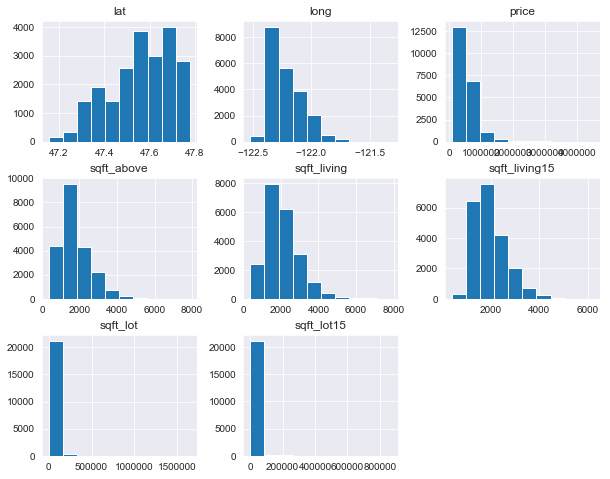

In [31]:
# update our data to reflect the dropped entries
df2 = df_sqft_drop
# update our dataframe for analysing continuous varables to refelct the change in the original data
df_conts = df2.loc[:,conts]
# create histrograms and check cental tendencies
df_conts.hist(figsize=(10,8))
df_conts.describe()

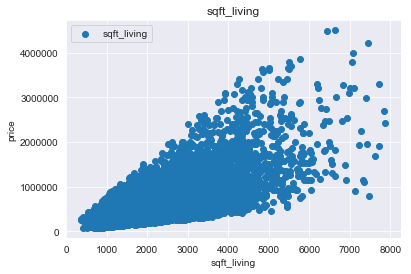

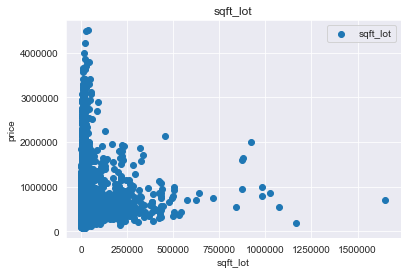

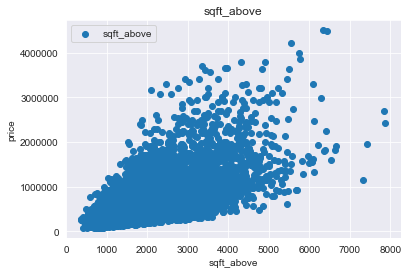

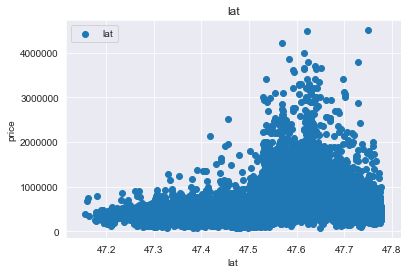

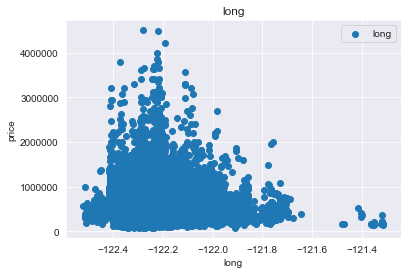

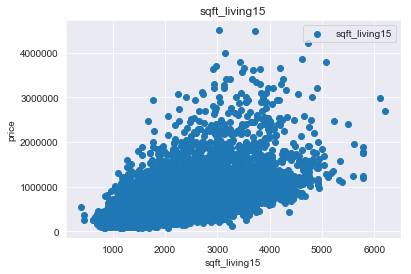

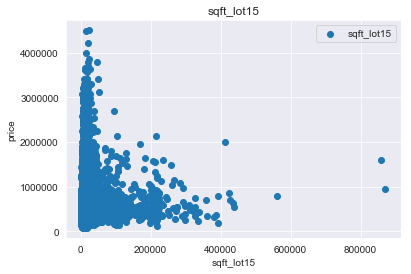

In [32]:
# create scatter plots for each of the continuous variables we are researching
for col in conts[1:]: 
    plt.scatter(df2[col], df2.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

This looks much better! But, there still seem to be a number of outliers remaining for sqft-lot. Let's remove those as well and check again. 

In [34]:
# Visual inspection of the sqft_lot shows us the values begin to become very spread out after 500000sqft

# create the upper limit for what we think to be normal in our data
upper_limit = 500000
# count the number of entries that we are considering outliers
outlier_count = df2[df2['sqft_lot'] >= upper_limit]
len(outlier_count)

21

Again, a relatively low number of entries given the size of our data. Let's remove them and see where we are.

In [35]:
# create a test dataframe to see what effect dropping outliers will have
df_lot_drop = df2[df2['sqft_lot'] <= 500000]
df_lot_drop.sqft_lot.describe()

count     21503.000000
mean      14297.268381
std       31957.465596
min         520.000000
25%        5040.000000
50%        7609.000000
75%       10650.000000
max      499571.000000
Name: sqft_lot, dtype: float64

In this case the median and mean have moved slightly more, but still not too much. Let's keep these changes and see what the overall effect is. 

,price,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15
count,2.150300e+04,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000
mean,5.376469e+05,2075.508487,14297.268381,1785.159001,47.560249,-122.214129,1985.263591,12523.730735
std,3.505857e+05,900.958191,31957.465596,817.772758,0.138487,0.140503,683.900573,25260.884331
min,7.800000e+04,370.000000,520.000000,370.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,1423.500000,5040.000000,1190.000000,47.471300,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7609.000000,1560.000000,47.571900,-122.231000,1840.000000,7620.000000
75%,6.430000e+05,2550.000000,10650.000000,2210.000000,47.678150,-122.125000,2360.000000,10077.000000
max,4.500000e+06,7880.000000,499571.000000,7880.000000,47.777600,-121.315000,6210.000000,560617.000000


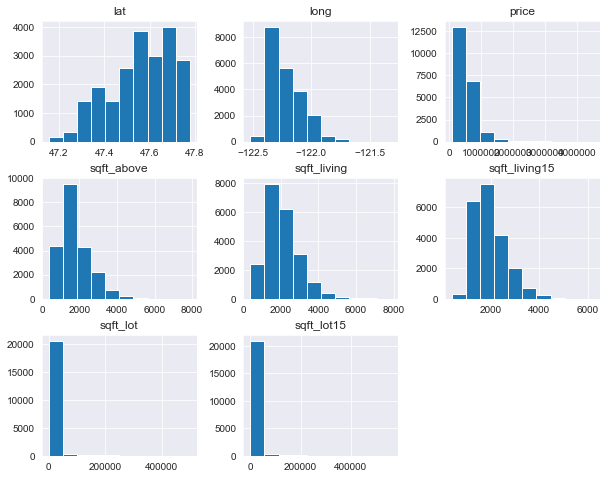

In [36]:
# update our data to reflect dropped outliers for sqft_lot
df2 = df_lot_drop
# update the continuous variable analysis data
df_conts = df2.loc[:,conts]
# create histograms and check central tendencies
df_conts.hist(figsize=(10,8))
df_conts.describe()

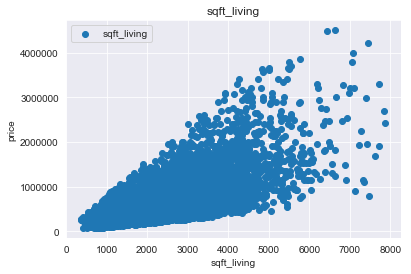

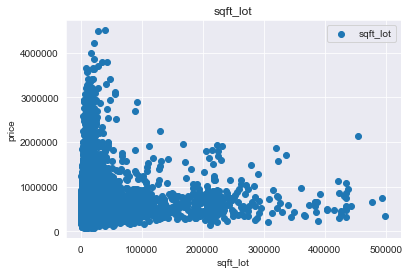

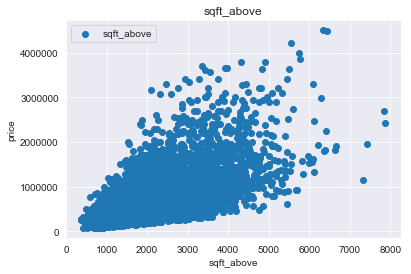

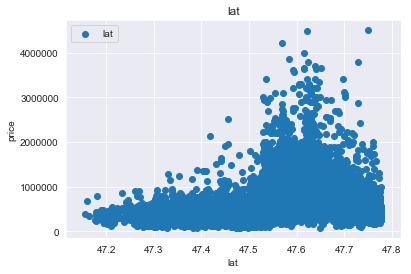

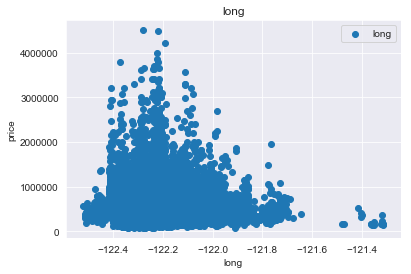

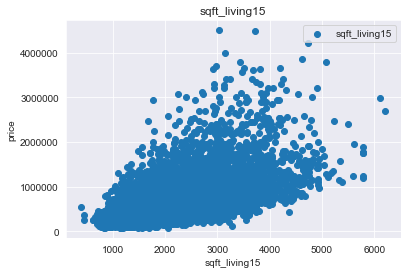

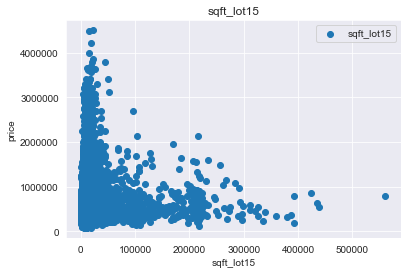

In [37]:
# create scatter plots for each of the continuous variables
for col in conts[1:]: 
    plt.scatter(df2[col], df2.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

These distributions look much better. Overall skewness has been reduced for price and sqft_living variables and scatter plots are more tighlty clustered without removing a significant amoiunt of data. 

sqft_lot is still very skewed, we will need to keep an eye on that as we refine our analysis. 

**New Limits:** We also now how new limits on out analysis to keep in mind. We are only considering houses with less than 8000sqft_living and less than 500000sqft_lot. That will need to be established as an auumption for our final model. 

### Analyzing Categorical Variables

Let's take a look at our categorical variables and determine what we want to do with them.

In [40]:
# To better learn seaborn I have created a funciton here to take a list of values and plot a series of graphs and charts
# function is meant to take a list of independent variables, a dependent variable, and a daraframe that contains both
def seaborn_plotter(independent_vs, dependent_v, df):

#Loop through the independent variables, putting a divider between each iteration with the variable name
    for i in independent_vs:
        print ("Kings County Data Set - Exploratory Data Analysis for: " + i)
        print ("-------------------------------------------------------------------------------------")
        
        #create subplots for each visual 
        plt.figure(figsize=(12,12))
        ax1 = plt.subplot(2,2,1)
        ax2 = plt.subplot(2,2,2)
        ax3 = plt.subplot(2,2,3)
        ax4 = plt.subplot(2,2,4)
        
        #seaborn boxplot and set labels - shows range, quartiles, and median for each category value        
        a = sns.boxplot(x=i, y=dependent_v, data=df, ax=ax3)
        a.axes.set_title('Boxplot' ,fontsize=20)
        a.set_xlabel(i,fontsize=15)
        a.set_ylabel('Price', fontsize=15)
        a.tick_params(labelsize=10)
        
        #seaborn countplot and set labels - counts number of each category occuring 
        b = sns.countplot(df[i], ax=ax4)
        b.axes.set_title('Variable Count' ,fontsize=20)
        b.set_xlabel(i,fontsize=15)
        b.set_ylabel('Count', fontsize=15)
        b.tick_params(labelsize=10)
        
        #seaborn scatterplot and set labels - shows relationship of category and price
        c = sns.scatterplot(x=i, y=dependent_v, data=df, ax=ax1)
        c.axes.set_title('Scatterplot' ,fontsize=20)
        c.set_xlabel(i,fontsize=15)
        c.set_ylabel('Price', fontsize=15)
        c.tick_params(labelsize=10)
        
        #seaborn distplot and set labels - plots distribution of category values
        d = sns.distplot(df[i], ax=ax2)
        d.axes.set_title('Histogram',fontsize=20)
        d.set_xlabel(i,fontsize=15)
        d.set_ylabel('KDE', fontsize=15)
        d.tick_params(labelsize=10)
        
        plt.show()
        
        #Input an observation for each variable         
        input('Observations: ')
        print("\n")
        input('Approach: ')
        print("\n")

Kings County Data Set - Exploratory Data Analysis for: bedrooms
-------------------------------------------------------------------------------------


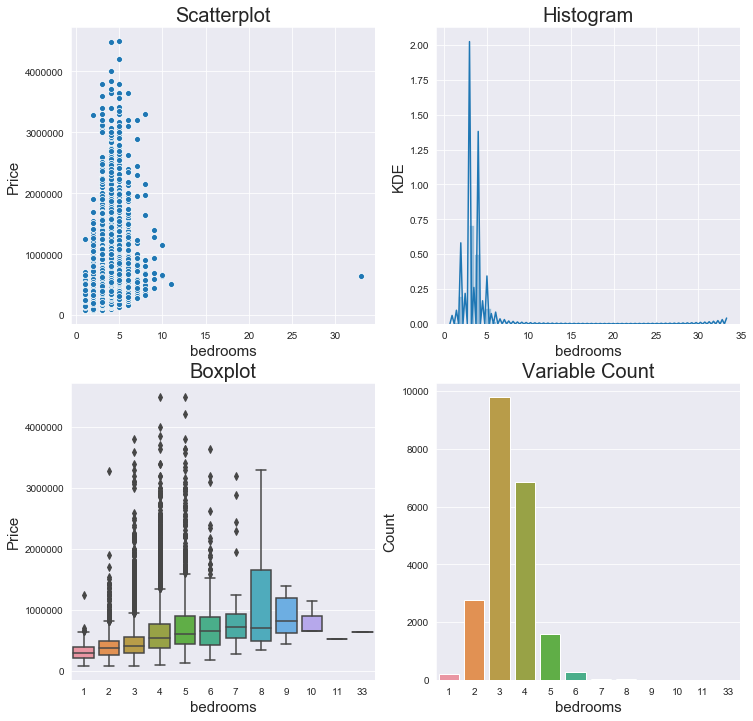

Observations: The column like scatter of a categorical variable is present, and there is an odd looking value out to the right (33 bedrooms) to look into further. The boxplot shows some increase in median value as number of rooms goes up, which makes sense, but also a large number of outliers. This may be a good predictor of price.


Approach: Check into potential outliers and bin.


Kings County Data Set - Exploratory Data Analysis for: bathrooms
-------------------------------------------------------------------------------------


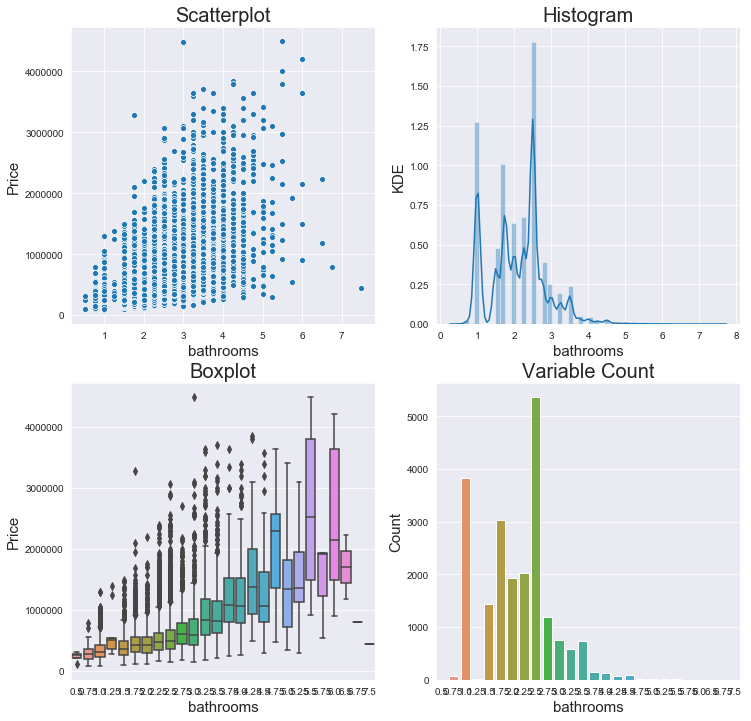

Observations: The column-like scatter and histogram is present again, but there also appears to be some linearity. The boxplot shows an increase in median price as x goes up, but becomes less consistent as quartile ranges increase as well. 


Approach: We can bin this variable as well, as it appears that it will have some predictive ability.


Kings County Data Set - Exploratory Data Analysis for: floors
-------------------------------------------------------------------------------------


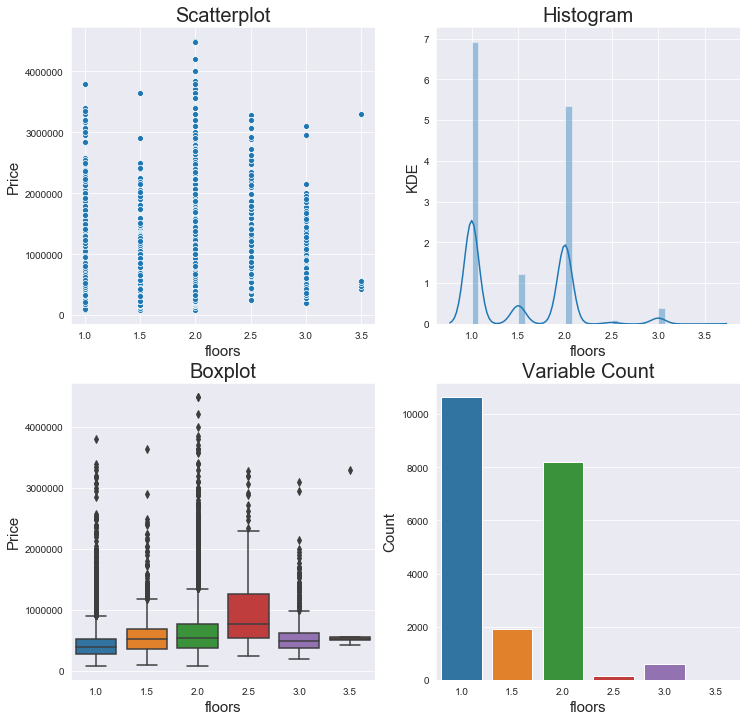

Observations: Clear column formation of a categorical variable, and this time with less unique values. The median price values for each category don't appear to change as significantly, and actually go down after 2.5. This is a little counterintuitive as one might assume that a larger number of floors is a proxy for larger home size, which also indicated greater price. This value make have less predictive ability.


Approach: We should look for collinearity with sqft. We can also try to bin this down to 3 values instead of 6. This could be an early candidate to drop in the model.


Kings County Data Set - Exploratory Data Analysis for: waterfront
-------------------------------------------------------------------------------------


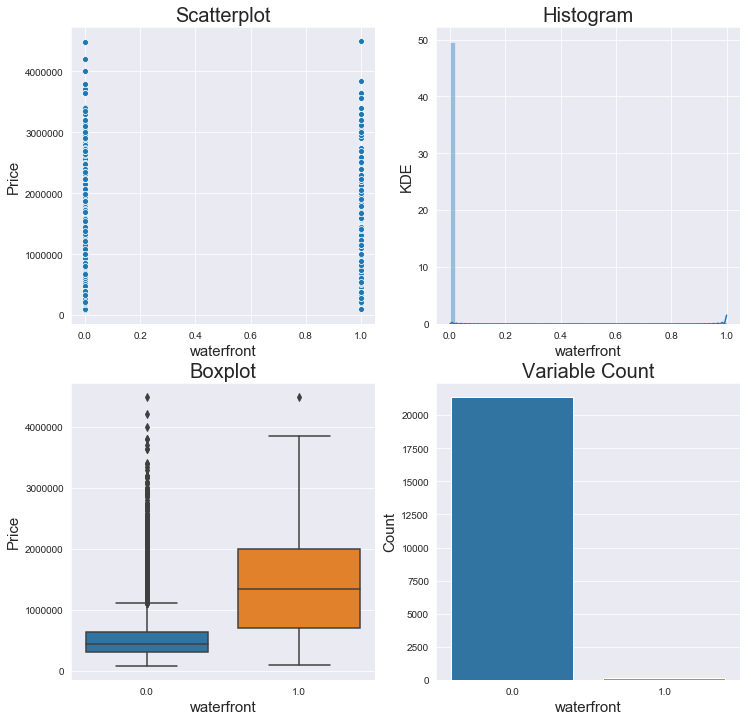

Observations: aterfront is clearly a categorical value with some predictive ability based on the higher median value in the box plot.


Approach: This is likely a good predictor for our model, and because it is already coded correctly as a category we don’t need to do anything to it.


Kings County Data Set - Exploratory Data Analysis for: view
-------------------------------------------------------------------------------------


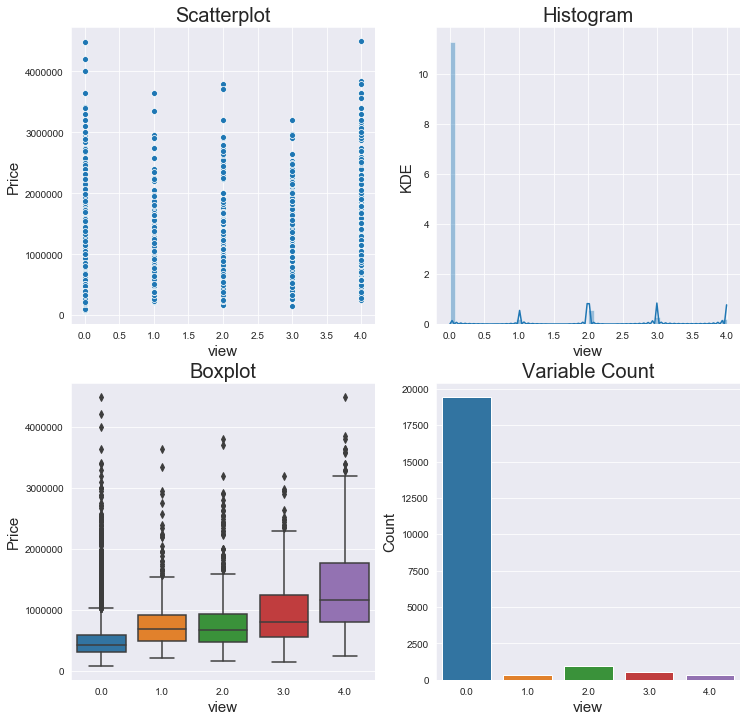

Observations: View is interesting. Again it is clearly categorical, but the relationship between how many times a home has been viewed and price is not intuitive. Perhaps more views drives competition. With so many 0 values for this variable, large range of outliers, and only small variation in median price it is likely not a great predictor.


Approach: The best way to use this may be to create a binary and bin that way - 0 views vs Any views.


Kings County Data Set - Exploratory Data Analysis for: condition
-------------------------------------------------------------------------------------


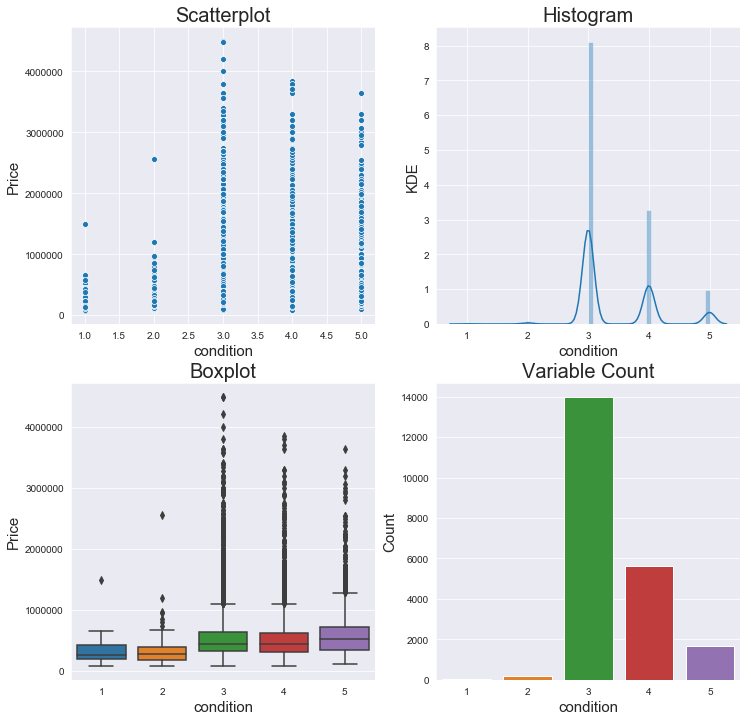

Observations: Condition would intuitively seem to have a significant influence on price, but the distribution of price vs. this variable is very interesting. The most expensive homes are in the middle, and median price barely changes as condition goes up.


Approach: We can create dummy variables for this to see if there is any effect on price, the lower values do appear to have a downward effect, but this may also be an early candidate to drop.


Kings County Data Set - Exploratory Data Analysis for: grade
-------------------------------------------------------------------------------------


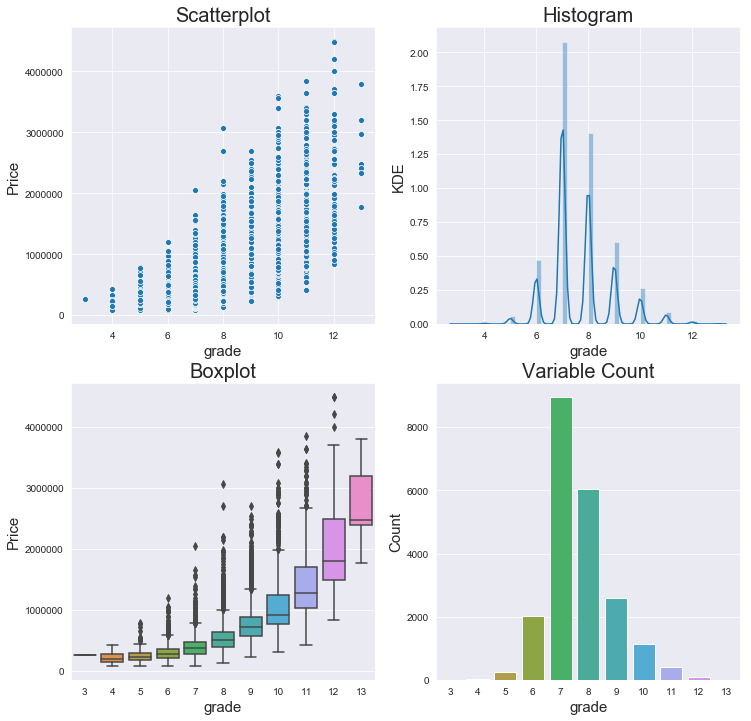

Observations: Grade is categorical (columnar scatter) but appears to have some level of linear relationship, as grades go up in the scatter and box plot price goes up as well. It will be interesting to see if there is any relationship between grade and condition. Grade also appears to have a more normal distribution. It might be a good predictor.


Approach: With 13 variables it will be best to create dummy variables and bin this category.


Kings County Data Set - Exploratory Data Analysis for: sqft_basement
-------------------------------------------------------------------------------------


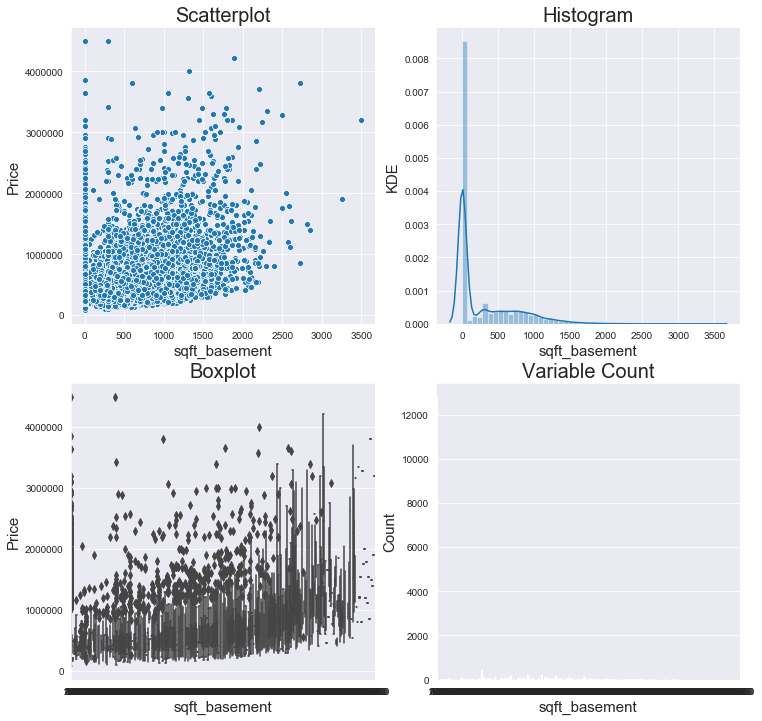

Observations: sqft_basement is clearly a continuous variable that snuck in under our categorical variable counts (due to day_of_year being our cutoff). It is interesting that it has a low number of unique values compare to other continuous variables, obviously due to the large number of homes with 0 basement space. 


Approach: Treat as a continuous variable.


Kings County Data Set - Exploratory Data Analysis for: yr_built
-------------------------------------------------------------------------------------


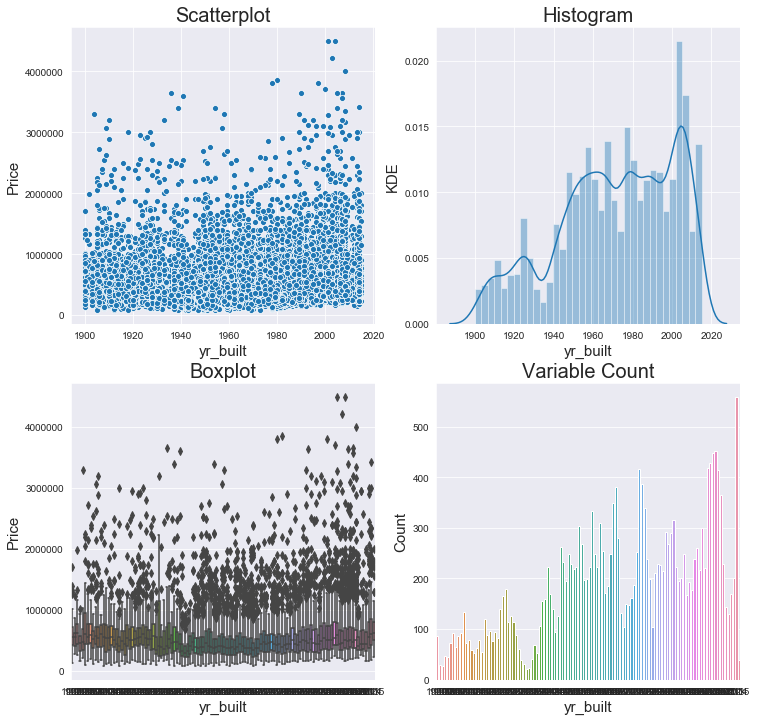

Observations: yr_built has a high enough number of values it looks like it could be treated as a continuous variable as well. Although it appears that the linearity of the relationship doesn't look that strong. This may not actually be that strong of a predictor. Newer homes don't appear to be that much differently priced than older ones. Although, there are many more of them. 


Approach: Treat as a continuous variable for now. Potentially bin into decades or create an 'age' variable as an experiment to introduce some differentiation. 


Kings County Data Set - Exploratory Data Analysis for: zipcode
-------------------------------------------------------------------------------------


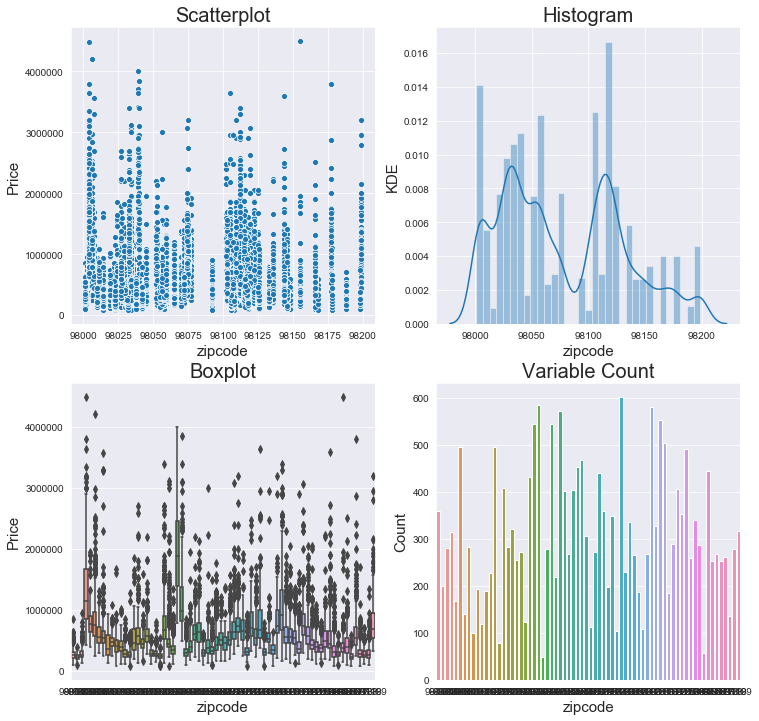

Observations: Zipcode is interesting because intuitively it would seem that some areas are better indicators of price than others(i.e. the 'nice' part of town). Here we see a great deal of variability across categories, with some zip codes having much greater ranges than others. Problematically, some zip codes appear to have very small numbers of entries.


Approach: With 70 different categories for zipcode it would be unwieldy to create a dummy variable for each, and bins to not make as much sense as other categorical variables because zipcodes are not uniform. With lat and long included in this data set those may serve as better variables for predicting price based on area of town. We can drop this for our initial model and return to it if we are looking for something to add robustness later on. One challenge with keeping zipcode is that this model would only be applicable for houses in these zip codes in future applications.


Kings County Data Set - Exploratory Data Analysis for: d

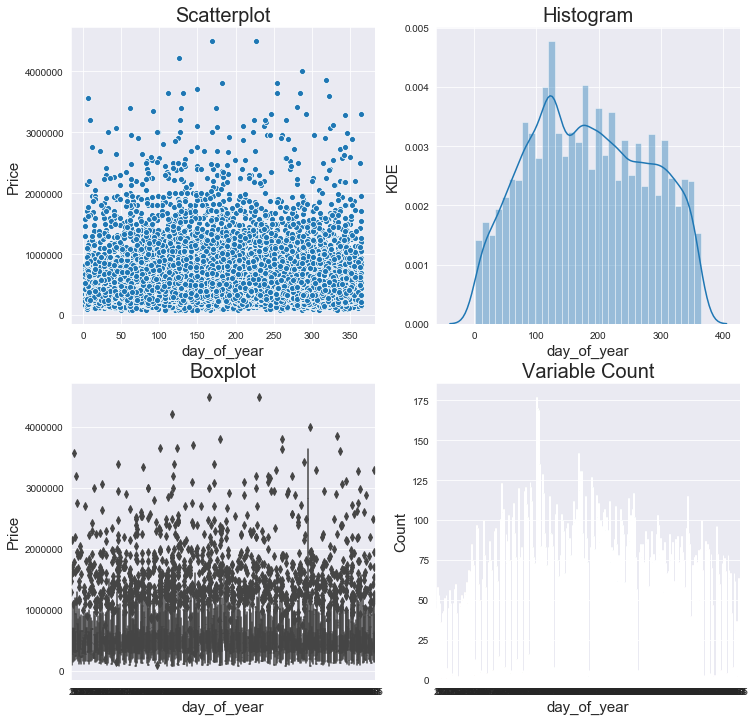

Observations: day_of_year was hypothesized to have some predictive values based on seasonality, but here we see that the scatter plot shows a relatively flat relationship. This makes sense because the days aren't truly 'increasing' throughout the year, the day of the year is just a reference point. Although it is interesting that the histogram shows some level of distribution, the greatest number of sales come in mid year. 


Approach: It would be very unwieldy to create dummy variables for this many unique values, and we in fact already have bins in the next variable, months. We’ll likely drop this variable.


Kings County Data Set - Exploratory Data Analysis for: month
-------------------------------------------------------------------------------------


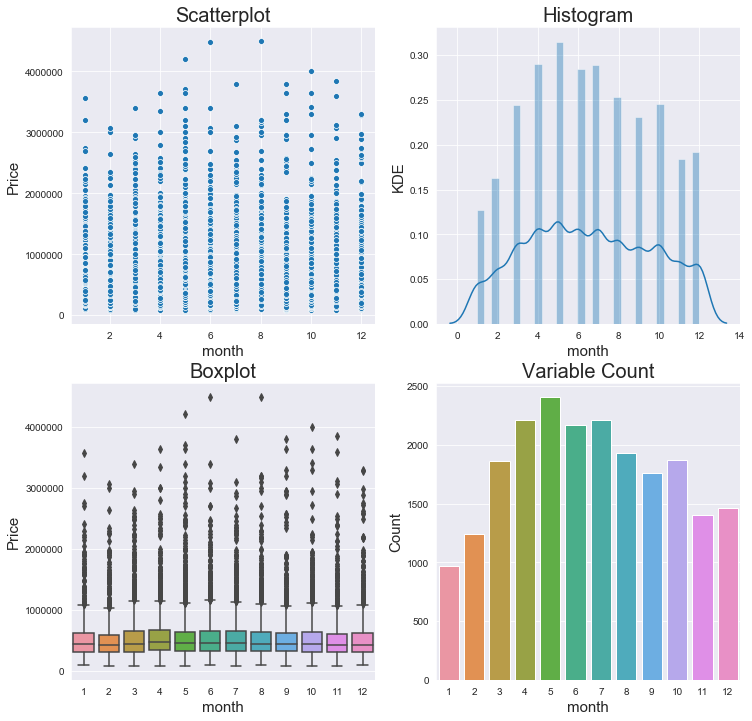

Observations: This is more digestible set of information than what we have for days. It still shows little variability in median price across months in our box plot, but because I really want to know if time of year has as little of an effect as this appears we can keep it for now.


Approach: We can create dummy variables for this category, but to make it easier to work with we can bin it by quarter.




In [42]:
seaborn_plotter(cats, df2.price, df2)

That was a fun look at our categorical variables! 
**As a review we will:**
* Check into the bedroom outlier (33 bedrooms?) and then create dummy variables and bins
* Create dummy variables and bins for: bathrooms, floor, view, condition, and grade
* We'll leave yr_built alone for now, but keep an eye on it
* Drop zipcode and day_of_year
* Bin month into quarters

That's going to be a lot of bins! 

We also now have more refined hypotheses on which of these values we'll likely keep and drop in our model.
* **Likely Keep:** Bedroom, Waterfront, Grade, Year Built, Month
* **Likely Drop:** Floors, View, Condition
* **Inbetween:** Bathroom

And we'll revist zipcode if we are looking to add more complexity at the end

### Creating Dummy Variables and Binning

In [43]:
# drop the variables we've decided we are not going to work with for now in a new dataframe
# begin df3
df3 = df2.drop(['zipcode', 'day_of_year'], axis=1)
df3.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,month
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,10
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,12


**Bedrooms**

In [44]:
# look into the bedroom outlier
df.loc[df["bedrooms"] == 33,].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,1040,580.0,1947,98103,47.6878,-122.331,1330,4700,176,6


Upon further inspection this is clearly an error - this house has 33 bedrooms, but 1.75 bathrooms and 1620sqft of living space. It's likely meant to be 3 bedrooms and an entry error. We can update that entry.

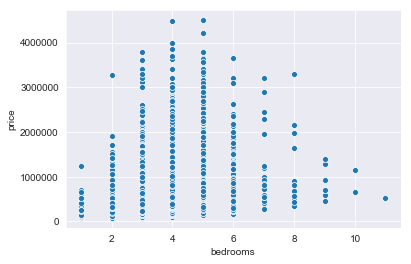

count    21534.000000
mean         3.373038
std          0.926410
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [46]:
# reassign the value of our outlier entry
df3.loc[df3["bedrooms"] == 33, "bedrooms"] = 3
# check to see how it has changed the distribution
sns.scatterplot(x='bedrooms', y='price', data=df3)
plt.show()
df.bedrooms.describe()

This looks much better. 

In [47]:
# create dummy variables and bins for bedrooms
# make 6 bins
bins = [0, 1, 2, 3, 4, 6, 11]
# use pd.cut to return unordered categories
bins_br = pd.cut(df3['bedrooms'], bins)
# return ordered categories
bins_br = bins_br.cat.as_ordered()
bins_br.head()

0    (2, 3]
1    (2, 3]
2    (1, 2]
3    (3, 4]
4    (2, 3]
Name: bedrooms, dtype: category
Categories (6, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 6] < (6, 11]]

Text(0.5, 1.0, 'Bedroom Bins')

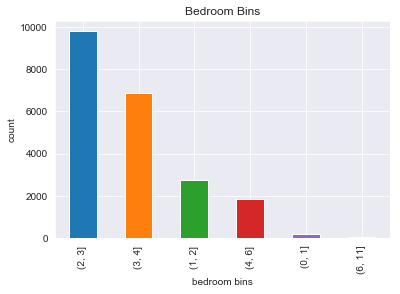

In [48]:
# see what our distribution of bins looks like
bins_br.value_counts().plot(kind='bar')
plt.xlabel('bedroom bins')
plt.ylabel('count')
plt.title('Bedroom Bins')

In [49]:
# replace existing bedrooms columns
df3['bedrooms']=bins_br
# perform label encoding
df3['bedrooms'] = df3['bedrooms'].cat.codes
# create dummy variables
br_dummy = pd.get_dummies(bins_br, prefix='br')
# drop existing column
df3 = df3.drop(['bedrooms'], axis=1) 

In [50]:
df3.head(2)

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,month
0,221900.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,10
1,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,12


In [51]:
df3 = pd.concat([df3, br_dummy], axis=1)
df3.head(2)

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,long,sqft_living15,sqft_lot15,month,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 6]","br_(6, 11]"
0,221900.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,...,-122.257,1340,5650,10,0,0,1,0,0,0
1,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,...,-122.319,1690,7639,12,0,0,1,0,0,0


**Bathrooms**

In [52]:
# check initial distribution to estimate bin sizes
df3.bathrooms.describe()

count    21503.000000
mean         2.113263
std          0.762370
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          7.500000
Name: bathrooms, dtype: float64

In [53]:
# create dummy variables and bins for bathrooms
# make 4 bins
bins = [0, 1, 2, 3, 8]
# use pd.cut to return unordered categories
bins_bth = pd.cut(df3['bathrooms'], bins)
# return ordered categories
bins_bth = bins_bth.cat.as_ordered()
bins_bth.head()

0    (0, 1]
1    (2, 3]
2    (0, 1]
3    (2, 3]
4    (1, 2]
Name: bathrooms, dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 8]]

Text(0.5, 1.0, 'Bathroom Bins')

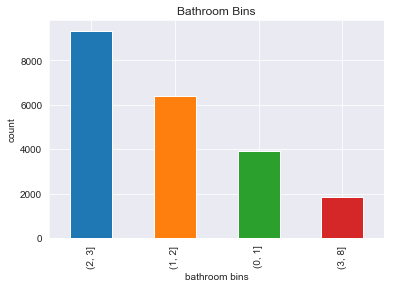

In [54]:
# see what our distribution of bins looks like
bins_bth.value_counts().plot(kind='bar')
plt.xlabel('bathroom bins')
plt.ylabel('count')
plt.title('Bathroom Bins')

In [55]:
# replace existing bathroom columns
df3['bathrooms']=bins_bth
# perform label encoding
df3['bathrooms'] = df3['bathrooms'].cat.codes
# create dummy variables
bth_dummy = pd.get_dummies(bins_bth, prefix='bth')
# drop existing column
df3 = df3.drop(['bathrooms'], axis=1)
# add dummy columns
df3 = pd.concat([df3, bth_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 6]","br_(6, 11]","bth_(0, 1]","bth_(1, 2]","bth_(2, 3]","bth_(3, 8]"
0,221900.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,...,0,0,1,0,0,0,1,0,0,0
1,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,...,0,0,1,0,0,0,0,0,1,0


**Floors**

In [56]:
# check initial distribution to estimate bin sizes
df.floors.describe()

count    21534.000000
mean         1.494126
std          0.539806
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [57]:
# create dummy variables and bins for floors
# make 3 bins
bins = [0, 1, 2, 3.5]
# use pd.cut to return unordered categories
bins_flr = pd.cut(df3['floors'], bins)
# return ordered categories
bins_flr = bins_flr.cat.as_ordered()
bins_flr.head()

0    (0.0, 1.0]
1    (1.0, 2.0]
2    (0.0, 1.0]
3    (0.0, 1.0]
4    (0.0, 1.0]
Name: floors, dtype: category
Categories (3, interval[float64]): [(0.0, 1.0] < (1.0, 2.0] < (2.0, 3.5]]

Text(0.5, 1.0, 'Floors Bins')

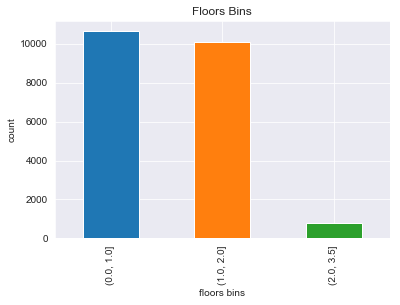

In [58]:
# see what our distribution of bins looks like
bins_flr.value_counts().plot(kind='bar')
plt.xlabel('floors bins')
plt.ylabel('count')
plt.title('Floors Bins')

In [59]:
# replace existing floors columns
df3['floors']=bins_flr
# perform label encoding
df3['floors'] = df3['floors'].cat.codes
# create dummy variables
flr_dummy = pd.get_dummies(bins_flr, prefix='flr')
# drop existing column
df3 = df3.drop(['floors'], axis=1)
# add dummy columns
df3 = pd.concat([df3, flr_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,...,"br_(3, 4]","br_(4, 6]","br_(6, 11]","bth_(0, 1]","bth_(1, 2]","bth_(2, 3]","bth_(3, 8]","flr_(0.0, 1.0]","flr_(1.0, 2.0]","flr_(2.0, 3.5]"
0,221900.0,1180,5650,0.0,0.0,3,7,1180,0.0,1955,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,2570,7242,0.0,0.0,3,7,2170,400.0,1951,...,0,0,0,0,0,1,0,0,1,0


**View**

In [60]:
# check initial distribution to estimate bin sizes
df3.view.describe()

count    21503.000000
mean         0.232154
std          0.762308
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [61]:
# will turn this into a binary category, with 0 = no views, and 1 = any views
# reassign any value greater than 0 to 1
df3.loc[df3["view"] > 0, "view"] = 1

In [62]:
# check new value counts
df3.view.value_counts()

0.0    19405
1.0     2098
Name: view, dtype: int64

In [63]:
df3.head(2) 

,price,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,...,"br_(3, 4]","br_(4, 6]","br_(6, 11]","bth_(0, 1]","bth_(1, 2]","bth_(2, 3]","bth_(3, 8]","flr_(0.0, 1.0]","flr_(1.0, 2.0]","flr_(2.0, 3.5]"
0,221900.0,1180,5650,0.0,0.0,3,7,1180,0.0,1955,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,2570,7242,0.0,0.0,3,7,2170,400.0,1951,...,0,0,0,0,0,1,0,0,1,0


**Condition**

In [64]:
# check initial distribution to estimate bin sizes
df3.condition.describe() 

count    21503.000000
mean         3.409803
std          0.650651
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [65]:
# create dummy variables and bins for condition
# make 5 bins
bins = [0, 1, 2, 3, 4, 5]
# use pd.cut to return unordered categories
bins_cond = pd.cut(df3['condition'], bins)
# return ordered categories
bins_cond = bins_cond.cat.as_ordered()
bins_cond.head()

0    (2, 3]
1    (2, 3]
2    (2, 3]
3    (4, 5]
4    (2, 3]
Name: condition, dtype: category
Categories (5, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5]]

Text(0.5, 1.0, 'Condition Bins')

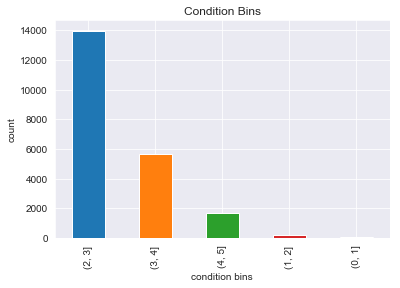

In [66]:
# see what our distribution of bins looks like
bins_cond.value_counts().plot(kind='bar')
plt.xlabel('condition bins')
plt.ylabel('count')
plt.title('Condition Bins')

In [67]:
# replace existing condition columns
df3['condition']=bins_cond
# perform label encoding
df3['condition'] = df3['condition'].cat.codes
# create dummy variables
cond_dummy = pd.get_dummies(bins_cond, prefix='cond')
# drop existing column
df3 = df3.drop(['condition'], axis=1)
# add dummy columns
df3 = pd.concat([df3, cond_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,grade,sqft_above,sqft_basement,yr_built,lat,...,"bth_(2, 3]","bth_(3, 8]","flr_(0.0, 1.0]","flr_(1.0, 2.0]","flr_(2.0, 3.5]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]"
0,221900.0,1180,5650,0.0,0.0,7,1180,0.0,1955,47.5112,...,0,0,1,0,0,0,0,1,0,0
1,538000.0,2570,7242,0.0,0.0,7,2170,400.0,1951,47.7210,...,1,0,0,1,0,0,0,1,0,0


**Grade**

In [68]:
# check initial distribution to estimate bin sizes
df3.grade.describe()

count    21503.000000
mean         7.654513
std          1.167419
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [69]:
# create dummy variables and bins for grade
# make 4 bins
bins = [3, 5, 7, 9, 13]
# use pd.cut to return unordered categories
bins_grd = pd.cut(df3['grade'], bins)
# return ordered categories
bins_grd = bins_grd.cat.as_ordered()
bins_grd.head()

0    (5, 7]
1    (5, 7]
2    (5, 7]
3    (5, 7]
4    (7, 9]
Name: grade, dtype: category
Categories (4, interval[int64]): [(3, 5] < (5, 7] < (7, 9] < (9, 13]]

Text(0.5, 1.0, 'Grade Bins')

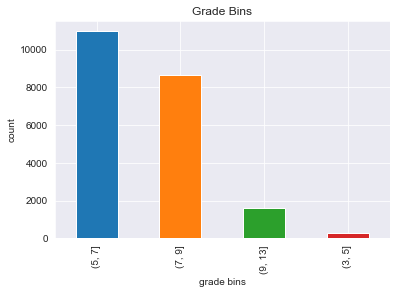

In [70]:
# see what our distribution of bins looks like
bins_grd.value_counts().plot(kind='bar')
plt.xlabel('grade bins')
plt.ylabel('count')
plt.title('Grade Bins')

In [71]:
# replace existing grade columns
df3['grade']=bins_grd
# perform label encoding
df3['grade'] = df3['grade'].cat.codes
# create dummy variables
grd_dummy = pd.get_dummies(bins_grd, prefix='grd')
# drop existing column
df3 = df3.drop(['grade'], axis=1)
# add dummy columns
df3 = pd.concat([df3, grd_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,lat,long,...,"flr_(2.0, 3.5]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","grd_(3, 5]","grd_(5, 7]","grd_(7, 9]","grd_(9, 13]"
0,221900.0,1180,5650,0.0,0.0,1180,0.0,1955,47.5112,-122.257,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,2570,7242,0.0,0.0,2170,400.0,1951,47.7210,-122.319,...,0,0,0,1,0,0,0,1,0,0


**Month**

In [72]:
# create dummy variables and bins for month and turn them into quarters
# make 4 bins
bins = [0, 3, 6, 9, 12]
# use pd.cut to return unordered categories
bins_mnth = pd.cut(df3['month'], bins)
# return ordered categories
bins_mnth = bins_mnth.cat.as_ordered()
bins_mnth.head()

0    (9, 12]
1    (9, 12]
2     (0, 3]
3    (9, 12]
4     (0, 3]
Name: month, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

Text(0.5, 1.0, 'Month Bins')

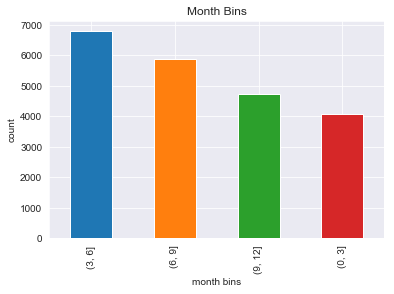

In [73]:
# see what our distribution of bins looks like
bins_mnth.value_counts().plot(kind='bar')
plt.xlabel('month bins')
plt.ylabel('count')
plt.title('Month Bins')

In [74]:
# replace existing grade columns
df3['month']=bins_mnth
# perform label encoding
df3['month'] = df3['month'].cat.codes
# create dummy variables
mnth_dummy = pd.get_dummies(bins_mnth, prefix='season')
# drop existing column
df3 = df3.drop(['month'], axis=1)
# add dummy columns
df3 = pd.concat([df3, mnth_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,lat,long,...,"cond_(3, 4]","cond_(4, 5]","grd_(3, 5]","grd_(5, 7]","grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]"
0,221900.0,1180,5650,0.0,0.0,1180,0.0,1955,47.5112,-122.257,...,0,0,0,1,0,0,0,0,0,1
1,538000.0,2570,7242,0.0,0.0,2170,400.0,1951,47.7210,-122.319,...,0,0,0,1,0,0,0,0,0,1


### Looking more deeply into location with Lat & Long

Intuitively it would seem that locaiton matters in home sale prices, yet above it seemed that the linearity of relationship between lat, long, and price was not very strong. We can explore more here by plotting all the valeus together in a color scaled scatter plot, and determine what to do next.

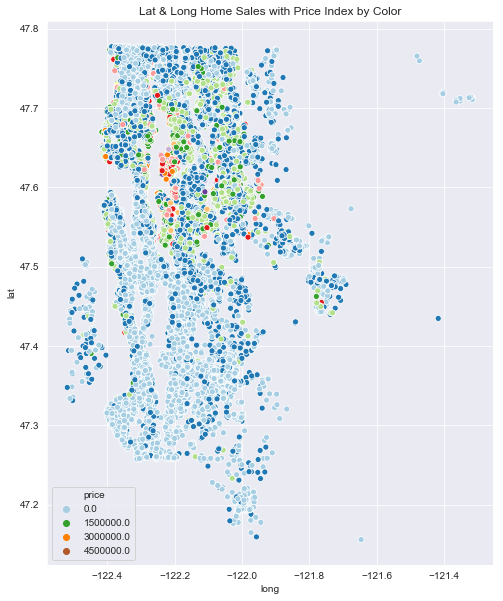

In [75]:
# create scatter plot with long and lat on x,y axes and color scale based on price. 
plt.figure(figsize=(8,10))
sns.scatterplot(x='long', y='lat', hue='price', data=df3, palette='Paired')
plt.title('Lat & Long Home Sales with Price Index by Color')
plt.legend(fancybox=True);

**Obervations:**  It appears that there are indeed concentrations of higher priced home sales based on concentrated locations. One way to potentially make this information more workable for our model may be to divide Kings County into quadrants based on Lat and Long by binning both values into 2 segements, essentially creating coordinates like ([0,0], [0,1], [1,0], [1,1])

In [76]:
# create dummy variables and bins for lat
# make 2 bins
bins = [47, 47.5, 47.8]
# use pd.cut to return unordered categories
bins_lat = pd.cut(df3['lat'], bins)
# return ordered categories
bins_lat = bins_lat.cat.as_ordered()
bins_lat.head()

0    (47.5, 47.8]
1    (47.5, 47.8]
2    (47.5, 47.8]
3    (47.5, 47.8]
4    (47.5, 47.8]
Name: lat, dtype: category
Categories (2, interval[float64]): [(47.0, 47.5] < (47.5, 47.8]]

In [77]:
# replace existing lat columns
df3['lat']=bins_lat
# perform label encoding
df3['lat'] = df3['lat'].cat.codes
# create dummy variables
lat_dummy = pd.get_dummies(bins_lat, prefix='lat')
# drop existing column
df3 = df3.drop(['lat'], axis=1)
# add dummy columns
df3 = pd.concat([df3, lat_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,long,sqft_living15,...,"grd_(3, 5]","grd_(5, 7]","grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]","lat_(47.0, 47.5]","lat_(47.5, 47.8]"
0,221900.0,1180,5650,0.0,0.0,1180,0.0,1955,-122.257,1340,...,0,1,0,0,0,0,0,1,0,1
1,538000.0,2570,7242,0.0,0.0,2170,400.0,1951,-122.319,1690,...,0,1,0,0,0,0,0,1,0,1


In [78]:
# create dummy variables and bins for long
# make 2 bins
bins = [-122.6, -122, -121]
# use pd.cut to return unordered categories
bins_long = pd.cut(df3['long'], bins)
# return ordered categories
bins_long = bins_long.cat.as_ordered()
bins_long.head()

0    (-122.6, -122.0]
1    (-122.6, -122.0]
2    (-122.6, -122.0]
3    (-122.6, -122.0]
4    (-122.6, -122.0]
Name: long, dtype: category
Categories (2, interval[float64]): [(-122.6, -122.0] < (-122.0, -121.0]]

In [79]:
# replace existing lat columns
df3['long']=bins_long
# perform label encoding
df3['long'] = df3['long'].cat.codes
# create dummy variables
long_dummy = pd.get_dummies(bins_long, prefix='long')
# drop existing column
df3 = df3.drop(['long'], axis=1)
# add dummy columns
df3 = pd.concat([df3, long_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,...,"grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]","lat_(47.0, 47.5]","lat_(47.5, 47.8]","long_(-122.6, -122.0]","long_(-122.0, -121.0]"
0,221900.0,1180,5650,0.0,0.0,1180,0.0,1955,1340,5650,...,0,0,0,0,0,1,0,1,1,0
1,538000.0,2570,7242,0.0,0.0,2170,400.0,1951,1690,7639,...,0,0,0,0,0,1,0,1,1,0


### Data Exploration Conclusions

After review of our data a few early trends appear to be emerging that we may be able continue to refine hypotheses around: 
* Square footage appears to have the most linear relationship with price, with grade, bedrooms, and waterfront having the next most significant relationships
* Surprisingly time of year (season) may not have as a much impact, but we will contintue to include it for now to see if a significant relationship emerges in our model
* Location does appear to have some relationship with price. We have divided location into quadrants, which may end up being too broad. If so we can try to segement further and look for more signicficance. 

## Feature Engineering

In this section we will work to select important features for our model.
* Check for multicolinearity
* Normalize and scale features where necessary

In [80]:
# To analyze our independent variables we will create a slice of the dataframe without 'price'
df_dv = df3.iloc[:,1:]
df_dv.head(2)

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,"br_(0, 1]",...,"grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]","lat_(47.0, 47.5]","lat_(47.5, 47.8]","long_(-122.6, -122.0]","long_(-122.0, -121.0]"
0,1180,5650,0.0,0.0,1180,0.0,1955,1340,5650,0,...,0,0,0,0,0,1,0,1,1,0
1,2570,7242,0.0,0.0,2170,400.0,1951,1690,7639,0,...,0,0,0,0,0,1,0,1,1,0


### Multicolinearity

We'll begin by checking the correlation structure of our predictors. This is important because high correlation between variables indicates that changes in one predictor are closely associated with changes in another. We want the variables in our model to be as independent as possible. 

In [81]:
# check the correltion of each variable
pd.set_option('display.max_columns', 500)
df_dv.corr()

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 6]","br_(6, 11]","bth_(0, 1]","bth_(1, 2]","bth_(2, 3]","bth_(3, 8]","flr_(0.0, 1.0]","flr_(1.0, 2.0]","flr_(2.0, 3.5]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","grd_(3, 5]","grd_(5, 7]","grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]","lat_(47.0, 47.5]","lat_(47.5, 47.8]","long_(-122.6, -122.0]","long_(-122.0, -121.0]"
sqft_living,1.000000,0.199694,0.087715,0.264938,0.874075,0.419025,0.322320,0.760017,0.180989,-0.126028,-0.355878,-0.274149,0.362437,0.332194,0.096994,-0.470697,-0.246697,0.298675,0.521829,-0.377460,0.381002,-0.007652,-0.033756,-0.064261,0.101984,-0.084186,-0.017452,-0.139527,-0.542282,0.287061,0.554018,-0.023147,0.007632,0.014098,-0.001848,-0.089975,0.089975,-0.088023,0.088023
sqft_lot,0.199694,1.000000,0.018319,0.071147,0.209045,0.019444,0.065082,0.181338,0.779883,-0.002638,-0.044594,-0.008469,0.031525,0.017614,-0.005313,-0.053409,-0.018380,0.013004,0.080439,-0.009512,0.029219,-0.052750,0.009058,0.032615,-0.009570,0.015181,-0.019769,0.009444,-0.087431,0.019565,0.125612,-0.004248,0.001398,-0.009303,0.012462,0.118016,-0.118016,-0.224533,0.224533
waterfront,0.087715,0.018319,1.000000,0.235050,0.062129,0.065117,-0.021066,0.075862,0.030620,0.014845,0.019514,-0.015851,-0.009461,0.016452,-0.004537,-0.013549,-0.020033,-0.003456,0.057395,-0.020376,0.016747,0.009820,0.011733,0.004739,-0.014805,0.007143,0.011401,0.015048,-0.047124,-0.003516,0.089715,-0.005231,-0.000694,-0.003750,0.009761,0.008328,-0.008328,0.018715,-0.018715
view,0.264938,0.071147,0.235050,1.000000,0.146503,0.268312,-0.064322,0.270480,0.061418,-0.001696,-0.026384,-0.054384,0.031570,0.073692,0.012318,-0.083591,-0.035646,-0.003321,0.178933,-0.015559,0.010725,0.013026,0.000728,-0.018616,-0.037816,0.023090,0.035259,-0.014225,-0.177674,0.083432,0.188014,0.006963,0.001456,-0.002619,-0.005398,-0.066044,0.066044,0.007229,-0.007229
sqft_above,0.874075,0.209045,0.062129,0.146503,1.000000,-0.068848,0.427468,0.732837,0.192375,-0.112135,-0.318270,-0.224763,0.344486,0.229925,0.070659,-0.400923,-0.292382,0.321860,0.459388,-0.548896,0.537925,0.032065,-0.027474,-0.057634,0.194663,-0.143082,-0.088414,-0.118822,-0.549063,0.290062,0.552565,-0.019175,0.001690,0.017255,-0.002338,-0.027450,0.027450,-0.149513,0.149513
sqft_basement,0.419025,0.019444,0.065117,0.268312,-0.068848,1.000000,-0.132996,0.193819,0.011644,-0.048837,-0.135753,-0.143297,0.102692,0.249354,0.065392,-0.215894,0.037307,0.013651,0.211973,0.245122,-0.217897,-0.074131,-0.017471,-0.024846,-0.148727,0.090596,0.125938,-0.063828,-0.089129,0.048400,0.106058,-0.011901,0.012675,-0.005249,0.002688,-0.133145,0.133145,0.097680,-0.097680
yr_built,0.322320,0.065082,-0.021066,-0.064322,0.427468,-0.132996,1.000000,0.326979,0.071115,-0.092989,-0.203392,0.025606,0.130050,0.016797,-0.025559,-0.426629,-0.228043,0.427328,0.203539,-0.356515,0.295645,0.164815,-0.050726,-0.066299,0.391043,-0.256949,-0.244208,-0.135271,-0.392409,0.330110,0.187461,0.001947,-0.002594,0.010466,-0.010198,0.148380,-0.148380,-0.165075,0.165075
sqft_living15,0.760017,0.181338,0.075862,0.270480,0.732837,0.193819,0.326979,1.000000,0.194120,-0.074814,-0.270025,-0.200383,0.305610,0.190933,0.019043,-0.368413,-0.235366,0.300508,0.359455,-0.300134,0.325689,-0.067005,-0.009473,-0.052098,0.113392,-0.074206,-0.061248,-0.097821,-0.537335,0.295517,0.511193,-0.022089,0.015533,0.016648,-0.014455,-0.090409,0.090409,-0.110238,0.110238
sqft_lot15,0.180989,0.779883,0.030620,0.061418,0.192375,0.011644,0.071115,0.194120,1.000000,0.001765,-0.048300,0.005945,0.023830,0.008160,-0.007519,-0.050227,-0.016770,0.016955,0.066459,-0.003148,0.022339,-0.051400,-0.004406,0.025029,-0.015010,0.022588,-0.017911,0.011192,-0.078146,0.017167,0.111705,-0.012330,0.008232,-0.004328,0.007085,0.113017,-0.113017,-0.245251,0.245251
"br_(0, 1]",-0.126028,-0.002638,0.014845,-0.001696

In [82]:
# Check for values greater than our cutoff of .75
pd.set_option('display.max_columns', 500)
abs(df_dv.corr())>.75

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 6]","br_(6, 11]","bth_(0, 1]","bth_(1, 2]","bth_(2, 3]","bth_(3, 8]","flr_(0.0, 1.0]","flr_(1.0, 2.0]","flr_(2.0, 3.5]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","grd_(3, 5]","grd_(5, 7]","grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]","lat_(47.0, 47.5]","lat_(47.5, 47.8]","long_(-122.6, -122.0]","long_(-122.0, -121.0]"
sqft_living,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living15,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot15,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"br_(0, 1]",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


With 39 rows and columns this is a difficult chart to read. To make it a lttle more interpretable we can convert to a heat map. We will look for values greater than .75 as a cutoff for variables that are too closely related. 

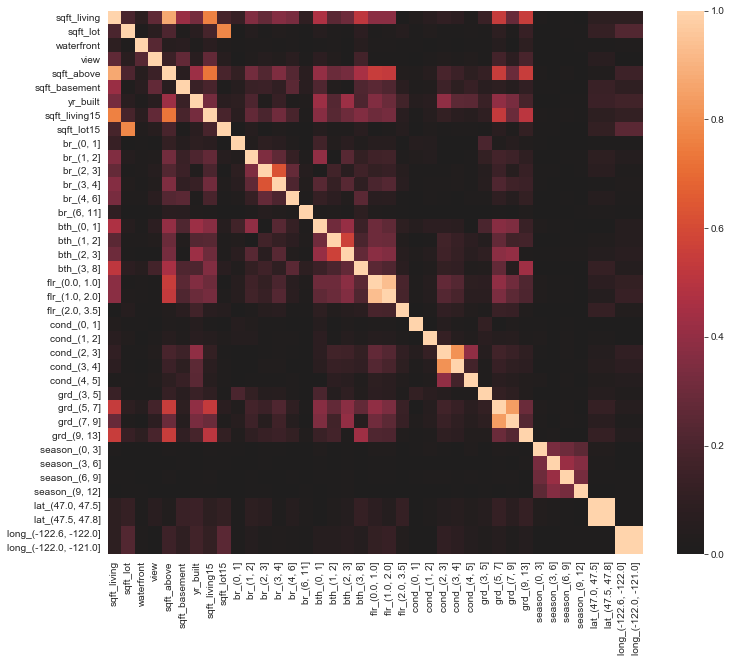

In [83]:
# create a heatmap to visualy inspect correlation
plt.figure(figsize=(12,10))
sns.heatmap(abs(df_dv.corr()), center=.0, xticklabels=df_dv.columns.values, yticklabels=df_dv.columns.values);

**Observations:**
* Our analysis above shows us that sqft_living is highly correlated with sqft_above and sqft_living15. This makes sense, as the majority of living space in most homes likely is above the basement, and similarly sized homes are often grouped together. We can analyze each and see if there is one that is better to keep than others (likely sqft_living)
* sqft_lot is highly correlated with sqft_lot15 - likely also because similar sized lots tend to be grouped together - we can likely drop sqft_lot15
* There is the appearance of colinearity for some categorical values, but as they are cetegories this is misleading, and they only have low values to draw from and similar slopes. 

### Baseline Model

We can continue to tighen and fit our model, but at this point it will be intersting to see where we are based on our work already. We need to adjust our dataframe a little to make sure it is readable by statsmodels first.

In [84]:
# the ']' created by making dummy bins earlier is unreadable by statsmodels, we can rename those columns
# begin df_dv2
df_dv2 = df_dv.rename(columns={'br_(0, 1]':'br1',
       'br_(1, 2]':'br2', 'br_(2, 3]':'br3', 'br_(3, 4]':'br4', 'br_(4, 6]':'br5', 'br_(6, 11]':'br6',
       'bth_(0, 1]':'bth1', 'bth_(1, 2]':'bth2', 'bth_(2, 3]':'bth3', 'bth_(3, 8]':'bth4',
       'flr_(0.0, 1.0]':'flr1', 'flr_(1.0, 2.0]':'flr2', 'flr_(2.0, 3.5]':'flr3', 'cond_(0, 1]':'cond1',
       'cond_(1, 2]':'cond2', 'cond_(2, 3]':'cond3', 'cond_(3, 4]':'cond4', 'cond_(4, 5]':'cond5',
       'grd_(3, 5]':'grd1', 'grd_(5, 7]':'grd2', 'grd_(7, 9]':'grd3', 'grd_(9, 13]':'grd4',
       'season_(0, 3]':'season1', 'season_(3, 6]':'season2', 'season_(6, 9]':'season3', 'season_(9, 12]':'season4',
       'lat_(47.0, 47.5]':'lat0', 'lat_(47.5, 47.8]':'lat1', 'long_(-122.6, -122.0]':'long0',
       'long_(-122.0, -121.0]':'long1'})

In [85]:
# add price back in to run with our model
df_dv2 = pd.concat([df_dv2, df3['price']], axis=1) 
df_dv2.head(2)

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,br1,br2,br3,br4,br5,br6,bth1,bth2,bth3,bth4,flr1,flr2,flr3,cond1,cond2,cond3,cond4,cond5,grd1,grd2,grd3,grd4,season1,season2,season3,season4,lat0,lat1,long0,long1,price
0,1180,5650,0.0,0.0,1180,0.0,1955,1340,5650,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,221900.0
1,2570,7242,0.0,0.0,2170,400.0,1951,1690,7639,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,538000.0


In [86]:
# import libraries we'll need to run our model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

# set our dependent variable
outcome = 'price'
# set independent variables
x_cols = df_dv2.drop(['price',], axis=1).columns
predictors = '+'.join(x_cols)
# create model
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df_dv2).fit()
# check our model
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.708      
Dependent Variable:     price                AIC:                    583693.8614
Date:                   2019-08-25 14:20     BIC:                    583957.0676
No. Observations:       21503                Log-Likelihood:         -2.9181e+05
Df Model:               32                   F-statistic:            1626.      
Df Residuals:           21470                Prob (F-statistic):     0.00       
R-squared:              0.708                Scale:                  3.5949e+10 
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept     1116426.7887  70929.6495  15.7399 0.0000  977399.3926 1255454.1848
sqft_living        98.5757     20.0105   4.9262 0.0000      59.3537     137.7978
sqft_lot            0.1503      0.0655   2.2965 0.0217       0.0220       0.2786
waterfront     578828.2038  15695.2451  36.8792 0.0000  548064.3543  609592.0532
view           112793.0315   4863.6928  23.1908 0.0000  103259.8313  122326.2316
sqft_above         79.7340     20.0561   3.9755 0.0001      40.4225     119.0454
sqft_basement      48.9742     20.0217   2.4461 0.0145       9.7301      88.2182
yr_built        -1759.4751     63.7495 -27.5998 0.0000   -1884.4290   -1634.5213
sqft_living15      52.4817      3.2255  16.2710 0.0000      46.1596      58.8039
sqft_lot15         -0.2845      0.0829  -3.4301 0.0006      -0.4470      -0.1219
br1            212308.9249  16886.2012  12.5729 0.0000  179210.7128  245407.1370
br2            224163.4002  13473.2284  16.6377 0.0000  197754.8689  250571.9314
br3            208488.3074  13164.0622  15.8377 0.0000  182685.7649  234290.8499
br4            175218.7610  13095.8670  13.3797 0.0000  149549.8863  200887.6357
br5            155570.6063  13452.2332  11.5647 0.0000  129203.2272  181937.9854
br6            140676.7889  23999.7634   5.8616 0.0000   93635.4650  187718.1128
bth1           243859.1814  17302.9371  14.0935 0.0000  209944.1359  277774.2269
bth2           252449.6096  17670.8786  14.2862 0.0000  217813.3713  287085.8479
bth3           255498.1725  18309.6116  13.9543 0.0000  219609.9701  291386.3749
bth4           364619.8252  19130.5794  19.0595 0.0000  327122.4647  402117.1857
flr1           343191.9917  23780.5400  14.4316 0.0000  296580.3620  389803.6214
flr2           347046.9119  23610.0781  14.6991 0.0000  300769.4003  393324.4236
flr3           426187.8851  24439.8695  17.4382 0.0000  378283.9205  474091.8496
cond1          143787.4850  32148.5185   4.4726 0.0000   80773.9942  206800.9757
cond2          199814.6567  19728.7401  10.1281 0.0000  161144.8567  238484.4567
cond3          222728.5071  16452.7638  13.5375 0.0000  190479.8645  254977.1496
cond4          254835.9684  16111.6252  15.8169 0.0000  223255.9830  286415.9539
cond5          295260.1716  16032.1058  18.4168 0.0000  263836.0501  326684.2931
grd1          -182671.6054 190464.4397  -0.9591 0.3375 -555996.0936  190652.8828
grd2          -147004.8634 190299.8718  -0.7725 0.4398 -520006.7863  225997.0594
grd3           -82146.0757 190355.6558  -0.4315 0.6661 -455257.3392  290965.1879
grd4           152829.8031 190504.5603   0.8022 0.4224 -220573.3246  526232.9307
season1        290495.4999  17884.8419  16.2426 0.0000  255439.8777  325551.1222
season2        286947.7796  17857.6415  16.0686 0.0000  251945.4721  321950.0871
season3        269805.3731  17882.5338  15.0876 0.0000  234754.2749  304856.4712
season4        269178.1361  17891.9310  15.0447 0.0000  234108.6187  304247.6535
lat0           455974.9903  35679.7574  12.7797 0.0000  386040.0081  525909.9724
lat1   

**Observations:** Our baseline model performed fairly well
* **r-squared = .708** - which means our regression line explains roughly 70% of prices in our data
* Our **p-values** are generally very good as well, with most less than 0.00, which means our data is significant and we can reject the null-hypothesis that there is no relation bewteen the variable and price
    * p-vales for grade groups are all above .05, which indicates they are not significant. This is surprising given earlier observations, we will look further into this
* **Coefficient values** are very high for most parameters, which is not surprising given that most are categorical and are 0 or 1
    * The three largest coefficients are lat1 (656980.29), long0 (595270.02), and waterfront (578828.20) supporting the earlier hypothesis that location has a large impact on price
    * Smallest (closest to zero) coefficient is sqft_lot (0.14899). This parameter has some of the largest values, so not too surprising that it has a smaller coefficient. Also, looking at the scatter plot of the data shows many high prices at low lot sizes, which could be condos or higher density but highly desirable areas - we'll look further in here as well
    * Another interesting observation is that yr_built has a negative coefficient (-1749.86), which indicates that for this model newer is not an indicator of higher price.

Considering this model is already a decent fit, before we begin adjusting it let's check to make sure it is not over-fit by dividing it into training and test data and checking residuals.

In [88]:
# import train_test_split to create our training and testing data
from sklearn.model_selection import train_test_split

# set data equal to the data used in our most recent model
data = df_dv2
# independent variable
y = data[["price"]]
# dependent variables - use all columns except our independent variable
X = data.drop(["price"], axis=1)

# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#check the size of the data 
print(len(X_train), len(X_test), len(y_train), len(y_test))

17202 4301 17202 4301


In [89]:
# import LinearRegression for sklearn in order to run regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# establish predictied values for y for both data sets based on our model 
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# calculate mean squarred error for both and compare
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    3.691949e+10
dtype: float64
Test Mean Squarred Error: price    3.193030e+10
dtype: float64


These two values are very close, indiciating that our model is not overfit! 

### Second Model

While our baseline model was fairly successful, there is opportunity for improvement. To try to get an even better fit we can try: 
* Dropping parameters with high p-values
* Adding values back that we may have not been considering earlier (or considering incorrectly)
* Normalizing the distribution of some of our parameters with log transformations
* Dropping parameters that are colinear

For expediency we can just look at changes to R-squared as we drop, add, and adjust parameters in our model, and look deeper as needed. 

**Dropping parameters with high p-values and multicolinearity**

In [90]:
# set independent variables
x_cols = df_dv2.drop(['price', 'grd1','grd2','grd3','grd4'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
# create model - ensuring that we are using the correct version of the data
model = smf.ols(formula=f, data=df_dv2).fit()
# check r-squared
print('Baseline R-squared is .708')
print(f'New R-squared is {round(model.rsquared,3)}')

Baseline R-squared is .708
New R-squared is 0.687


It looks like dropping the the grade categories reduces accuracy of the model despite the high p-values, interesting. Let's see what happens if we also drop the colinear values we identified earlier. 

In [91]:
x_cols = df_dv2.drop(['price', 'grd1','grd2','grd3','grd4', 
                      'sqft_living15', 'sqft_above', "sqft_lot15"], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
# create model - ensuring that we are using the correct version of the data
model = smf.ols(formula=f, data=df_dv2).fit()
# check r-squared
print('Baseline R-squared is .708')
print(f'New R-squared is {round(model.rsquared,3)}')

Baseline R-squared is .708
New R-squared is 0.677


R-squared continues to get smaller. Let's look at a full summary to see what's happening

In [92]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                Adj. R-squared:       0.677      
Dependent Variable:     price              AIC:                  585813.2162
Date:                   2019-08-25 14:32   BIC:                  586020.5908
No. Observations:       21503              Log-Likelihood:       -2.9288e+05
Df Model:               25                 F-statistic:          1805.      
Df Residuals:           21477              Prob (F-statistic):   0.00       
R-squared:              0.677              Scale:                3.9685e+10 
----------------------------------------------------------------------------
                 Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------
Intercept     830918.1574 40575.4581  20.4783 0.0000 751387.2387 910449.0760
sqft_living      273.9799     2.7441  99.8446 0.0000    268.6013    279.3584
sqft_lot           0.0048     0.0455   0.1047 0.9166     -0.0845      0.0940
waterfront    590099.9761 16473.3556  35.8215 0.0000 557810.9728 622388.9795
view          143033.7064  5018.1524  28.5033 0.0000 133197.7541 152869.6587
sqft_basement    -77.2435     4.2420 -18.2091 0.0000    -85.5583    -68.9288
yr_built       -1401.0778    65.9247 -21.2527 0.0000  -1530.2951  -1271.8605
br1           211653.5043 14769.2597  14.3307 0.0000 182704.6558 240602.3528
br2           208447.2166  9446.5926  22.0659 0.0000 189931.1918 226963.2414
br3           178661.0832  8927.5992  20.0122 0.0000 161162.3241 196159.8424
br4           136378.9821  8807.2811  15.4848 0.0000 119116.0555 153641.9088
br5            89297.1280  9313.3711   9.5881 0.0000  71042.2272 107552.0287
br6             6480.2431 22716.3315   0.2853 0.7754 -38045.4578  51005.9441
bth1          167726.4529  9166.0455  18.2987 0.0000 149760.3214 185692.5845
bth2          168723.7152  9963.6693  16.9339 0.0000 149194.1815 188253.2488
bth3          179608.2552 11250.8848  15.9639 0.0000 157555.6834 201660.8270
bth4          314859.7341 12685.5994  24.8202 0.0000 289995.0150 339724.4532
flr1          254283.0819 13723.3187  18.5293 0.0000 227384.3556 281181.8082
flr2          249620.9771 13428.8839  18.5884 0.0000 223299.3649 275942.5893
flr3          327014.0984 15033.8421  21.7519 0.0000 297546.6487 356481.5480
cond1          93844.4856 31171.8048   3.0106 0.0026  32745.4275 154943.5436
cond2         140565.5294 16484.8114   8.5270 0.0000 108254.0718 172876.9870
cond3         165965.7815 11953.8195  13.8839 0.0000 142535.4054 189396.1576
cond4         196890.9664 11432.0402  17.2227 0.0000 174483.3164 219298.6164
cond5         233651.3945 11426.8551  20.4476 0.0000 211253.9079 256048.8811
season1       217913.6358 10488.6210  20.7762 0.0000 197355.1578 238472.1138
season2       217976.9691 10370.4540  21.0190 0.0000 197650.1072 238303.8310
season3       198216.1609 10412.2426  19.0368 0.0000 177807.3903 218624.9316
season4       196811.3915 10425.6867  18.8775 0.0000 176376.2693 217246.5137
lat0          301258.6204 20682.1529  14.5661 0.0000 260720.0610 341797.1798
lat1          529659.5369 20010.7267  26.4688 0.0000 490437.0228 568882.0511
long0         461358.0565 20112.7674  22.9386 0.0000 421935.5351 500780.5780
long1         369560.1008 20853.7144  17.7215 0.0000 328685.2682 410434.9335
----------------------------------------------------------------------------
Omnibus:             12521.366      Durbin-Watson:         1.991            
Prob(Omnibus):       0.000          Jarque-Bera (JB):      294749.350       
Skew:                2.351          Prob(JB):              0.000            
Kurtosis:            20.518         Condition No.:         25687641378769660
============================================================================
* The condition number is large (3e+16). This m

Wow, lots of interesting changes! The p-values for sqft_lot and br6 have increased significantly. The coefficient for sqft_basement has become negative, and has increase for sqft_living, which makes sense because it has increased to compensate for the value it was sharing with sqft_above and sqft_living15.

As these changes didn't improve the model, we can leave them in for now. Except for grade. Analysis for grade above seemed like it would have some predictive value, but p-values are too high. Let's add grade back in as a continuous variable and see how that changes the model. 

In [93]:
# create a new data frame so we can easily revert if necessary
# begin df_dv3
# drop grade categories
df_dv3 = df_dv2.drop(['grd1','grd2','grd3','grd4'], axis=1)
# add original grade column back in
df_dv3 = pd.concat([df_dv3, df2['grade']],axis=1)
df_dv3.head(2)

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,br1,br2,br3,br4,br5,br6,bth1,bth2,bth3,bth4,flr1,flr2,flr3,cond1,cond2,cond3,cond4,cond5,season1,season2,season3,season4,lat0,lat1,long0,long1,price,grade
0,1180,5650,0.0,0.0,1180,0.0,1955,1340,5650,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,221900.0,7
1,2570,7242,0.0,0.0,2170,400.0,1951,1690,7639,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,538000.0,7


In [94]:
# create x columns with new data frame - minus price
x_cols = df_dv3.drop(['price'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
# create model - ensuring that we are using the correct version of the data
model = smf.ols(formula=f, data=df_dv3).fit()
# check r-squared
print('Baseline R-squared is .708')
print(f'New R-squared is {round(model.rsquared,3)}')

Baseline R-squared is .708
New R-squared is 0.716


A little improvement! Let's see why.

In [95]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                   OLS                 Adj. R-squared:        0.715      
Dependent Variable:      price               AIC:                   583103.3048
Date:                    2019-08-25 14:34    BIC:                   583342.5832
No. Observations:        21503               Log-Likelihood:        -2.9152e+05
Df Model:                29                  F-statistic:           1865.      
Df Residuals:            21473               Prob (F-statistic):    0.00       
R-squared:               0.716               Scale:                 3.4980e+10 
-------------------------------------------------------------------------------
                 Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------
Intercept     1101237.5645 38440.0235  28.6482 0.0000 1025892.2559 1176582.8731
sqft_living        84.5490    19.7453   4.2820 0.0000      45.8468     123.2512
sqft_lot            0.1413     0.0646   2.1881 0.0287       0.0147       0.2678
waterfront     588816.9723 15472.3104  38.0562 0.0000  558490.0917  619143.8529
view           104399.6823  4799.7943  21.7509 0.0000   94991.7281  113807.6365
sqft_above         75.9749    19.7833   3.8403 0.0001      37.1980     114.7517
sqft_basement      49.0539    19.7497   2.4838 0.0130      10.3429      87.7649
yr_built        -2107.9922    63.3041 -33.2994 0.0000   -2232.0730   -1983.9114
sqft_living15      39.7394     3.2038  12.4037 0.0000      33.4597      46.0192
sqft_lot15         -0.2581     0.0818  -3.1545 0.0016      -0.4184      -0.0977
br1            237008.1035 13886.8535  17.0671 0.0000  209788.8366  264227.3704
br2            216266.6762  8872.9671  24.3737 0.0000  198874.9999  233658.3525
br3            192461.4575  8387.7770  22.9455 0.0000  176020.7900  208902.1250
br4            161518.7210  8283.4405  19.4990 0.0000  145282.5609  177754.8812
br5            148606.6906  8816.9574  16.8546 0.0000  131324.7974  165888.5837
br6            145375.9157 21500.1538   6.7616 0.0000  103234.0133  187517.8182
bth1           257405.7857  8766.3953  29.3628 0.0000  240222.9981  274588.5734
bth2           242508.9188  9457.5583  25.6418 0.0000  223971.4002  261046.4373
bth3           238964.8477 10626.5760  22.4875 0.0000  218135.9675  259793.7279
bth4           362358.0123 11957.7166  30.3033 0.0000  338919.9972  385796.0273
flr1           346038.6206 13019.5987  26.5783 0.0000  320519.2377  371558.0035
flr2           342734.9668 12729.8891  26.9236 0.0000  317783.4362  367686.4974
flr3           412463.9770 14240.8329  28.9635 0.0000  384550.8840  440377.0701
cond1          179148.2706 29338.6119   6.1062 0.0000  121642.4065  236654.1347
cond2          203485.2102 15523.4940  13.1082 0.0000  173058.0059  233912.4144
cond3          203660.0659 11254.3901  18.0961 0.0000  181600.6232  225719.5086
cond4          235604.0131 10766.6713  21.8827 0.0000  214500.5355  256707.4907
cond5          279340.0047 10776.9092  25.9202 0.0000  258216.4601  300463.5493
season1        286925.7400  9934.8364  28.8808 0.0000  267452.7207  306398.7592
season2        283327.7872  9815.3762  28.8657 0.0000  264088.9190  302566.6554
season3        265657.2408  9859.8548  26.9433 0.0000  246331.1911  284983.2905
season4        265326.7965  9874.0428  26.8711 0.0000  245972.9373  284680.6556
lat0           455647.4693 19634.2941  23.2067 0.0000  417162.7907  494132.1479
lat1           645590.0952 18920.4143  34.1214 0.0000  608504.6742  682675.5162
long0          581294.3385 19031.3935  30.5440 0.0000  543991.3901  618597.2870
long1          519943.2260 19781.2973  26.2846 0.0000  481170.4102  558716.0417
grade           95738.7525  2042.2045  46.8801 0.0000   91735.8797   99741.6253
-------------------------------------------------------

In [179]:
# set data for train-test
data = df_dv3

# independent variable
y = data[["price"]]
# dependent variables - use all columns except our independent variable
X = data.drop(["price"], axis=1)

# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# calculate mean squarred error for both and compare
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    3.404066e+10
dtype: float64
Test Mean Squarred Error: price    3.236735e+10
dtype: float64


MSE is still very close, indicating that we haven't over fit. 

**Obsevations:** 
* With a coefficient of 95878 grade appears to be a relatively significant variable.
    * considering the highest value for grade (13), it would have an impact of 1,244,603.7 on price (13 * 95738.75)
* P-values are now all fairly low, but sqft_lot has increased slighty (but still below .05), and still has  a very small coefficient.
* The coefficinet for yr_bulit is still negative, and greater than previously
* lat1, long0 and waterfront still have the highest coefficients

Our model is getting more accurate, but we can still probably do better. 

### Third Model - Normalizing

Earlier we saw that reducing outliers helped the normalize distribution of some of our variables, but they were all still fairly skewed (with lot variables beingthe worst). Let's see if doing some log transformations will normalize those variables and make them more useful in our regression. 

In [97]:
# select paramaters to normalize
norm_candidates = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15']
# we've skipped sqft_basement because it has a large number of 0 values, and cannot be log transformed

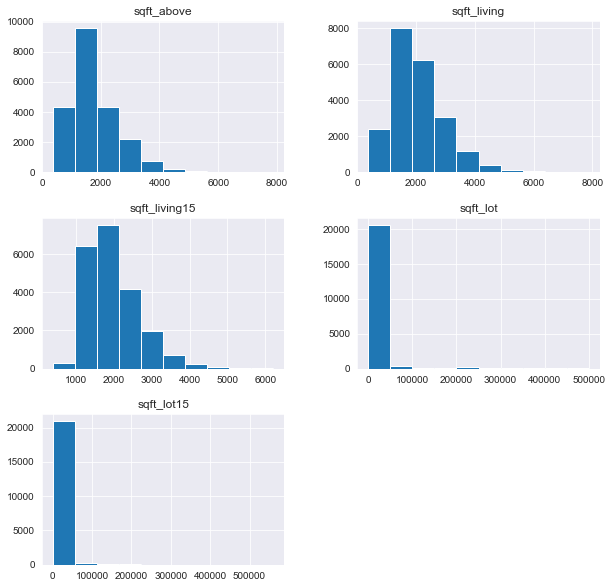

In [98]:
# check the current distribution
df_dv3[norm_candidates].hist(figsize=(10,10));

None of these are very normal, we can try to improve that via log transformation. 

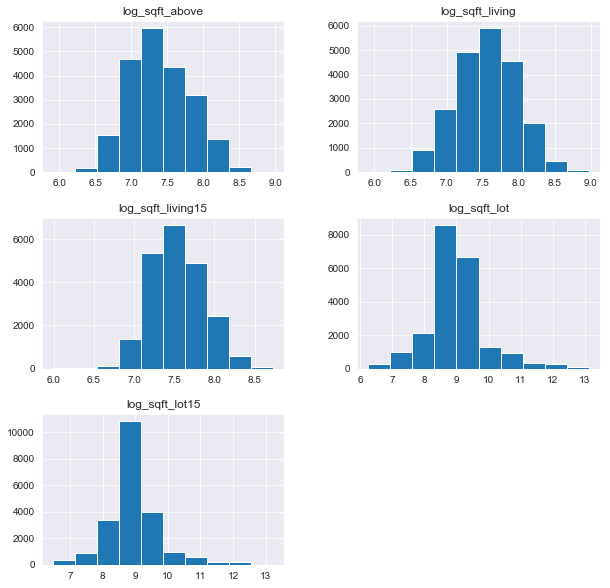

In [99]:
# create new dataframe to apply log transformations to
df_log = df_dv3

# apply numpy log to each variable
log_sqft_living = np.log(df_dv3['sqft_living'])
log_sqft_lot = np.log(df_dv3['sqft_lot'])
log_sqft_above = np.log(df_dv3['sqft_above'])
log_sqft_living15 = np.log(df_dv3['sqft_living15'])
log_sqft_lot15 = np.log(df_dv3['sqft_lot15'])

# list of log variable names
logs = ['log_sqft_above', 'log_sqft_living', 'log_sqft_living15' , 'log_sqft_lot', 'log_sqft_lot15']

# create new columns for log values
df_log['log_sqft_above'] = log_sqft_above
df_log['log_sqft_living'] = log_sqft_living
df_log['log_sqft_living15'] = log_sqft_living15
df_log['log_sqft_lot'] = log_sqft_lot
df_log['log_sqft_lot15'] = log_sqft_lot15

# check new distributions
df_log[logs].hist(figsize=(10,10));

Log transformation has normalized these variables significantly. Let's keep going to see how it looks in our model.

In [101]:
# drop original values for log transformed variables) 
df_log = df_log.drop(['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15'], axis=1)
df_log.head(2)

,waterfront,view,sqft_basement,yr_built,br1,br2,br3,br4,br5,br6,bth1,bth2,bth3,bth4,flr1,flr2,flr3,cond1,cond2,cond3,cond4,cond5,season1,season2,season3,season4,lat0,lat1,long0,long1,price,grade,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,0.0,0.0,0.0,1955,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,221900.0,7,7.073270,7.073270,7.200425,8.639411,8.639411
1,0.0,0.0,400.0,1951,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,538000.0,7,7.682482,7.851661,7.432484,8.887653,8.941022


In [102]:
# create x columns with new data frame - minus price
x_cols = df_log.drop(['price'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
# create model - ensuring that we are using the correct version of the data
model = smf.ols(formula=f, data=df_log).fit()
# check r-squared
print('Second Model R-squared is .716')
print(f'New R-squared is {round(model.rsquared,3)}')

Second Model R-squared is .716
New R-squared is 0.701


Our R-squared has actually gone down, and is below our baseline model. Let's see why. 

In [103]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                   OLS                   Adj. R-squared:          0.701      
Dependent Variable:      price                 AIC:                     584182.0823
Date:                    2019-08-25 14:59      BIC:                     584421.3607
No. Observations:        21503                 Log-Likelihood:          -2.9206e+05
Df Model:                29                    F-statistic:             1737.      
Df Residuals:            21473                 Prob (F-statistic):      0.00       
R-squared:               0.701                 Scale:                   3.6779e+10 
-----------------------------------------------------------------------------------
                     Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-----------------------------------------------------------------------------------
Intercept          537664.9983 43268.9524  12.4261 0.0000  452854.6294  622475.3671
waterfront         600079.1350 15886.3362  37.7733 0.0000  568940.7331  631217.5370
view                99806.2933  4927.8284  20.2536 0.0000   90147.3826  109465.2039
sqft_basement         193.7652     8.6704  22.3479 0.0000     176.7705     210.7599
yr_built            -2178.9520    65.3446 -33.3456 0.0000   -2307.0323   -2050.8717
br1                152749.8794 14351.2051  10.6437 0.0000  124620.4487  180879.3100
br2                108842.7278  9224.9550  11.7987 0.0000   90761.1290  126924.3266
br3                 76008.2402  9034.5217   8.4131 0.0000   58299.9048   93716.5756
br4                 62988.7521  9294.9835   6.7766 0.0000   44769.8922   81207.6120
br5                 61376.1446  9900.7343   6.1992 0.0000   41969.9680   80782.3211
br6                 75699.2542 22414.1486   3.3773 0.0007   31765.8537  119632.6546
bth1               108158.3959  9571.1118  11.3005 0.0000   89398.3040  126918.4878
bth2                90035.8957 10621.2260   8.4770 0.0000   69217.5018  110854.2895
bth3                87675.4995 12024.9070   7.2912 0.0000   64105.7862  111245.2128
bth4               251795.2072 13252.6628  18.9996 0.0000  225819.0012  277771.4132
flr1               166002.5330 14817.1431  11.2034 0.0000  136959.8290  195045.2370
flr2               159251.1100 14584.4252  10.9193 0.0000  130664.5504  187837.6695
flr3               212411.3553 15480.3036  13.7214 0.0000  182068.8074  242753.9032
cond1               70100.3886 30401.7856   2.3058 0.0211   10510.6249  129690.1522
cond2               92461.5272 16281.7588   5.6788 0.0000   60548.0674  124374.9870
cond3               88637.4163 12025.8588   7.3706 0.0000   65065.8376  112208.9951
cond4              119553.2919 11571.9727  10.3313 0.0000   96871.3637  142235.2202
cond5              166912.3743 11530.6399  14.4756 0.0000  144311.4614  189513.2871
season1            146213.8988 11117.2550  13.1520 0.0000  124423.2512  168004.5465
season2            142425.9821 11005.1746  12.9417 0.0000  120855.0204  163996.9438
season3            124356.6486 11062.3077  11.2415 0.0000  102673.7016  146039.5956
season4            124668.4687 11061.7307  11.2702 0.0000  102986.6528  146350.2846
lat0               173877.9369 22067.9263   7.8792 0.0000  130623.1580  217132.7159
lat1               363787.0613 21312.8470  17.0689 0.0000  322012.2940  405561.8286
long0              293768.3682 21317.3629  13.7807 0.0000  251984.7495  335551.9869
long1              243896.6301 22293.1624  10.9404 0.0000  200200.3717  287592.8885
grade              116254.0837  2027.6914  57.3332 0.0000  112279.6577  120228.5098
log_sqft_above     400791.9005 16363.2443  24.4934 0.0000  368718.7231  432865.0779
log_sqft_living   -197804.3559 18201.6681 -10.8674 0.0000 -233480.9809 -162127.7310
log_sqft_living15   92790.9687  6790.4935  13.6648 0.0000   79481.0959  106100.8416
log_sqft_lot         6962.415

**Observations:**
* log transformations have also had the effect of scaling values down for our continuos variables, which has increadsed their coefficients
* waterfront is now has the largest coefficient
* sqft_living oddly has a negative coefficient, which would indicate price goes down as sqft_living increases
* p-values are all relatively low, except for sqft_low, which is now above the threshold of .05 significance
    * Lot (and lot15) have a very poor linear relationship with price, we can explore dropping it
    
Let's try dropping some of the values we hypothesized earlier would not have significant effect (Floors, View, Condition), multicolinear values (sqft_above, sqft_living15, sqft_lot15), and see the results. 

In [129]:
# drop columns we don't want to consider in our model
x_cols = df_log.drop(['price', 'log_sqft_lot15', 'log_sqft_living15', 'log_sqft_above',
                      'cond1', 'cond2','cond3','cond4','cond5',
                      'flr1','flr2','flr3',
                      'view'], axis=1).columns
predictors = '+'.join(x_cols)

# create model
f = outcome + '~' + predictors
# create model - ensuring that we are using the correct version of the data
model = smf.ols(formula=f, data=df_log).fit()
# check r-squared
print('Second Model R-squared is .716')
print(f'New R-squared is {round(model.rsquared,3)}')

Second Model R-squared is .716
New R-squared is 0.677


Our r-squared has dropped again. Let's see what it did to the model. 

In [130]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                   OLS                 Adj. R-squared:        0.677      
Dependent Variable:      price               AIC:                   585825.9498
Date:                    2019-08-25 15:25    BIC:                   585985.4687
No. Observations:        21503               Log-Likelihood:        -2.9289e+05
Df Model:                19                  F-statistic:           2371.      
Df Residuals:            21483               Prob (F-statistic):    0.00       
R-squared:               0.677               Scale:                 3.9720e+10 
-------------------------------------------------------------------------------
                   Coef.     Std.Err.     t     P>|t|     [0.025      0.975]   
-------------------------------------------------------------------------------
Intercept       954693.5670 50825.3929  18.7838 0.0000 855072.0147 1054315.1193
waterfront      685243.1726 16127.0269  42.4904 0.0000 653632.9998  716853.3455
sqft_basement       17.2189     3.8043   4.5262 0.0000      9.7622      24.6756
yr_built         -2545.9604    63.3788 -40.1705 0.0000  -2670.1877   -2421.7332
br1             244726.7273 15243.6150  16.0544 0.0000 214848.1074  274605.3471
br2             177805.5830 10277.2021  17.3010 0.0000 157661.5021  197949.6639
br3             139257.9999 10136.8054  13.7379 0.0000 119389.1069  159126.8929
br4             120784.7008 10385.9162  11.6297 0.0000 100427.5322  141141.8695
br5             125721.1771 11043.5048  11.3842 0.0000 104075.0859  147367.2684
br6             146397.3789 23697.3709   6.1778 0.0000  99948.7685  192845.9893
bth1            211407.6012 11266.1333  18.7649 0.0000 189325.1415  233490.0609
bth2            179955.1999 12331.3840  14.5933 0.0000 155784.7696  204125.6303
bth3            187917.2943 13889.3770  13.5296 0.0000 160693.0818  215141.5067
bth4            375413.4717 15229.6599  24.6502 0.0000 345562.2049  405264.7384
season1         250247.7271 13000.2420  19.2495 0.0000 224766.2853  275729.1689
season2         246111.3600 12869.4892  19.1236 0.0000 220886.2035  271336.5166
season3         230128.0992 12914.0863  17.8199 0.0000 204815.5289  255440.6694
season4         228206.3807 12941.0308  17.6343 0.0000 202840.9974  253571.7641
lat0            384651.3795 25870.2943  14.8685 0.0000 333943.6775  435359.0815
lat1            570042.1875 25055.2095  22.7514 0.0000 520932.1124  619152.2626
long0           502677.6513 25001.8580  20.1056 0.0000 453672.1491  551683.1534
long1           452015.9157 26129.9904  17.2987 0.0000 400799.1900  503232.6415
grade           136834.9272  1997.6576  68.4977 0.0000 132919.3696  140750.4847
log_sqft_living 246974.2663  7536.5232  32.7703 0.0000 232202.1200  261746.4126
log_sqft_lot      9326.3258  1798.0838   5.1868 0.0000   5801.9479   12850.7038
-------------------------------------------------------------------------------
Omnibus:             14357.237      Durbin-Watson:         1.981               
Prob(Omnibus):       0.000          Jarque-Bera (JB):      431104.860          
Skew:                2.780          Prob(JB):              0.000               
Kurtosis:            24.219         Condition No.:         29045861648881446912
===============================================================================
* The condition number is large (3e+19). This might indicate             strong
multicollinearity or other numerical problems.
"""

We still have low p-values and coefficients have become closer together, but our overall model has become less accurate. It appears we should leave some of our previously doubted variables in. 

In a last effort to increase the accuracy of our model we can add zipcode back in to see if the additional information can help us get a model that accouts for a greater % of our observed prices. 

### Fourth Model - Adding Zip Code

Since our second model has performed the best so far we will use that as a baseline and add zip code back in. Zip code is a categorical variable, so we will need to create dummies for it. This will add a lot of complexity to our model, but will hopefully help significantly increase our model accuracy.

In [137]:
# create dummy variables for zipcode
zip_dummies = pd.get_dummies(df2['zipcode'],prefix='zip')

In [138]:
# create a new dataframe to work with that includes zipcode dummies
# use data from our second model as the baseline
df_zip = pd.concat([df_dv3, zip_dummies], axis=1)

In [143]:
df_zip.head(2)

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,br1,br2,br3,br4,br5,br6,bth1,bth2,bth3,bth4,flr1,flr2,flr3,cond1,cond2,cond3,cond4,cond5,season1,season2,season3,season4,lat0,lat1,long0,long1,price,grade,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1180,5650,0.0,0.0,1180,0.0,1955,1340,5650,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,221900.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2570,7242,0.0,0.0,2170,400.0,1951,1690,7639,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,538000.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
# create x columns with new data frame - minus price
x_cols = df_zip.drop(['price'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
# create model - ensuring that we are using the correct version of the data
model = smf.ols(formula=f, data=df_zip).fit()
# check r-squared
print('Second Model R-squared is .716')
print(f'New R-squared is {round(model.rsquared,3)}')

Second Model R-squared is .716
New R-squared is 0.816


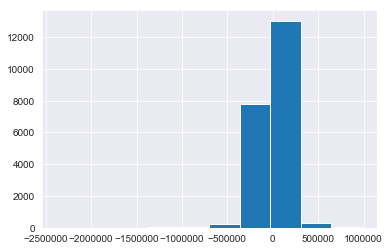

In [195]:
test = model.predict() - df_zip['price'] 
test.hist()

Wow, it looks like adding in zipcode has increased our model accuracy significanlty. Let's learn more. 

In [145]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                   OLS                 Adj. R-squared:        0.815      
Dependent Variable:      price               AIC:                   573916.2751
Date:                    2019-08-25 15:54    BIC:                   574705.8939
No. Observations:        21503               Log-Likelihood:        -2.8686e+05
Df Model:                98                  F-statistic:           967.3      
Df Residuals:            21404               Prob (F-statistic):    0.00       
R-squared:               0.816               Scale:                 2.2744e+10 
-------------------------------------------------------------------------------
                 Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------
Intercept      331929.1159 35053.8806   9.4691 0.0000  263220.8869  400637.3448
sqft_living        93.8495    15.9543   5.8824 0.0000      62.5779     125.1211
sqft_lot            0.3294     0.0525   6.2785 0.0000       0.2265       0.4322
waterfront     647149.6846 12644.0492  51.1822 0.0000  622366.4021  671932.9670
view           116651.0476  4023.8830  28.9897 0.0000  108763.9358  124538.1593
sqft_above         86.6907    16.0073   5.4157 0.0000      55.3152     118.0661
sqft_basement      30.4087    15.9483   1.9067 0.0566      -0.8511      61.6685
yr_built         -739.8317    58.0388 -12.7472 0.0000    -853.5920    -626.0713
sqft_living15      26.4719     2.7589   9.5950 0.0000      21.0642      31.8796
sqft_lot15         -0.1614     0.0676  -2.3877 0.0170      -0.2940      -0.0289
br1            112700.0393 11591.5314   9.7226 0.0000   89979.7704  135420.3082
br2             85225.2801  7752.1207  10.9938 0.0000   70030.5436  100420.0167
br3             79496.6952  7244.0960  10.9740 0.0000   65297.7250   93695.6654
br4             56140.7974  7146.0689   7.8562 0.0000   42133.9676   70147.6273
br5             32937.8991  7572.1549   4.3499 0.0000   18095.9088   47779.8893
br6            -34571.5953 17631.9789  -1.9607 0.0499  -69131.5932     -11.5975
bth1            86748.8969  8090.9446  10.7217 0.0000   70890.0401  102607.7537
bth2            52487.3979  8631.2721   6.0811 0.0000   35569.4588   69405.3370
bth3            49886.4654  9459.8445   5.2735 0.0000   31344.4623   68428.4685
bth4           142806.3557 10614.1697  13.4543 0.0000  122001.7890  163610.9224
flr1           128160.9273 11420.1067  11.2224 0.0000  105776.6637  150545.1909
flr2           103104.8647 11504.6341   8.9620 0.0000   80554.9211  125654.8082
flr3           100663.3239 13350.1199   7.5403 0.0000   74496.0900  126830.5578
cond1            -790.1819 23965.8639  -0.0330 0.9737  -47765.0684   46184.7046
cond2           59051.3538 12971.5519   4.5524 0.0000   33626.1415   84476.5660
cond3           60271.9908  9714.6156   6.2043 0.0000   41230.6173   79313.3643
cond4           81524.5770  9229.6568   8.8329 0.0000   63433.7590   99615.3950
cond5          131871.3761  9255.5349  14.2478 0.0000  113729.8351  150012.9171
season1         94061.7572  8986.1340  10.4674 0.0000   76448.2622  111675.2522
season2         91499.4992  8913.2408  10.2656 0.0000   74028.8803  108970.1181
season3         73399.9302  8939.9000   8.2104 0.0000   55877.0574   90922.8031
season4         72967.9292  8964.1234   8.1400 0.0000   55397.5765   90538.2818
lat0           148216.2348 17970.1107   8.2479 0.0000  112993.4732  183438.9964
lat1           183712.8811 17790.0491  10.3267 0.0000  148843.0537  218582.7084
long0          181286.8785 17864.1399  10.1481 0.0000  146271.8277  216301.9293
long1          150642.2374 18095.8057   8.3247 0.0000  115173.1042  186111.3705
grade           63536.7217  1737.4211  36.5696 0.0000   60131.2463   66942.1972
zip_98001     -165568.6530  9382.2846 -17.6469 0.0000 -

Very interesting, although we now have a much better r-squared, we still have some problematic p-values for cond1 and a few of our zip codes. This model now also has 98 degrees of freedom (Df = 98). With this many variables there is an incredibly large number of potential combinations. for our final iteration of the model we'll get some help by using a stepwise selection method to arrive at our final list of parameters. 

In [150]:
# create a function that takes dataframe columns as parameters, the target variable, and iterates through 
# combinations to select the best mix of p-values
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [154]:
result = stepwise_selection(df_zip.drop(['price'],axis=1),df_zip['price'])
print(result)

Add  grade                          with p-value 0.0
Add  zip_98004                      with p-value 0.0
Add  lat1                           with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  lat0                           with p-value 0.0
Add  zip_98039                      with p-value 3.03693e-284
Add  view                           with p-value 8.28715e-180
Add  zip_98112                      with p-value 5.67205e-195
Add  zip_98040                      with p-value 8.33963e-148
Add  bth4                           with p-value 1.84829e-116
Add  zip_98033                      with p-value 2.53148e-71
Add  zip_98105                      with p-value 2.72765e-69
Add  zip_98119                      with p-value 9.15334e-60
Add  zip_98199                      with p-value 2.34936e-52
Add  zip_98109        

Now that we have applied our selector let's see if the model is much improved with the selcted results. 

In [181]:
# create x columns with selected results
x_cols = df_zip[result]
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
# create model - ensuring that we are using the correct version of the data
model = smf.ols(formula=f, data=df_zip).fit()
# check r-squared
print('Fourth Model R-squared is .816')
print(f'New R-squared is {round(model.rsquared,3)}')

Fourth Model R-squared is .816
New R-squared is 0.815


The r-squared for the selected model is very close. Let's look to see how the parameters are being treated.

In [182]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                   OLS                 Adj. R-squared:        0.815      
Dependent Variable:      price               AIC:                   573916.1481
Date:                    2019-08-25 17:24    BIC:                   574522.3201
No. Observations:        21503               Log-Likelihood:        -2.8688e+05
Df Model:                75                  F-statistic:           1262.      
Df Residuals:            21427               Prob (F-statistic):    0.00       
R-squared:               0.815               Scale:                 2.2769e+10 
-------------------------------------------------------------------------------
                 Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------
Intercept      473360.8366 52022.4915   9.0992 0.0000  371392.8668  575328.8063
grade           63515.9559  1722.1422  36.8819 0.0000   60140.4286   66891.4832
zip_98004      636373.6248  9340.5363  68.1303 0.0000  618065.4759  654681.7737
lat1           262892.8934 26139.2767  10.0574 0.0000  211657.9583  314127.8284
waterfront     647700.0514 12620.6501  51.3207 0.0000  622962.6344  672437.4685
yr_built         -744.9592    53.4598 -13.9349 0.0000    -849.7445    -640.1740
sqft_above         57.2217     3.4526  16.5735 0.0000      50.4543      63.9890
lat0           210467.9432 26102.7015   8.0631 0.0000  159304.6983  261631.1882
zip_98039     1087185.7672 22209.1211  48.9522 0.0000 1043654.2308 1130717.3037
view           116577.0175  3993.2201  29.1937 0.0000  108750.0078  124404.0273
zip_98112      491924.4763 10216.2715  48.1511 0.0000  471899.8209  511949.1317
zip_98040      376960.1434  9919.6356  38.0014 0.0000  357516.9165  396403.3703
bth4            92406.0232  4506.4682  20.5052 0.0000   83573.0088  101239.0376
zip_98033      241131.3183  8083.2445  29.8310 0.0000  225287.5552  256975.0814
zip_98105      346886.7118 10837.3112  32.0086 0.0000  325644.7722  368128.6514
zip_98119      356074.2948 11958.0489  29.7770 0.0000  332635.6257  379512.9640
zip_98199      265574.8854  9368.7683  28.3468 0.0000  247211.3996  283938.3712
zip_98109      365221.8875 15094.8600  24.1951 0.0000  335634.8342  394808.9407
zip_98115      209279.4984  7367.0863  28.4074 0.0000  194839.4588  223719.5379
zip_98103      208045.9301  7358.8964  28.2713 0.0000  193621.9434  222469.9168
zip_98117      196962.7182  7536.7638  26.1336 0.0000  182190.0982  211735.3383
zip_98102      343956.8603 15509.7942  22.1768 0.0000  313556.5050  374357.2156
cond5           71437.3909  4179.5732  17.0920 0.0000   63245.1152   79629.6665
zip_98006      150076.6524  7812.6766  19.2094 0.0000  134763.2226  165390.0821
zip_98107      220917.4196 10090.9777  21.8926 0.0000  201138.3495  240696.4897
zip_98122      216284.1385  9844.8919  21.9692 0.0000  196987.4149  235580.8620
flr1            25798.4985  2906.7042   8.8755 0.0000   20101.1412   31495.8558
zip_98116      173990.0454  9237.4275  18.8353 0.0000  155883.9975  192096.0934
zip_98144      161474.3535  9083.9084  17.7759 0.0000  143669.2144  179279.4926
zip_98005      185785.3440 12271.8363  15.1392 0.0000  161731.6280  209839.0600
zip_98052      114462.5932  7245.2908  15.7982 0.0000  100261.2819  128663.9045
bth1            35553.5034  3408.8023  10.4299 0.0000   28871.9964   42235.0105
zip_98008      143217.8573  9701.2238  14.7629 0.0000  124202.7339  162232.9806
sqft_living15      26.1034     2.6954   9.6844 0.0000      20.8202      31.3867
zip_98023      -95932.2117  7736.8086 -12.3995 0.0000 -111096.9346  -80767.4888
zip_98136      124071.4817 10139.6213  12.2363 0.0000  104197.0665  143945.8970
cond4           21451.2866  2632.8882   8.1474 0.0000   16290.6291   26611.9442
zip_98092      -96110.5109  8936.3322 -10.7550 0.0000 -

We're now working with a much smaller set of data with Df = 75. All p-scores are appropriately low, but we also see that some of our categorical variables are no loger present. The selector only chose a few parameters for bedroom, floor, bathroom, and condition, and did not include all of the zipcodes. 

This is very interesting. A conculision we can draw is that in this model those values didn't have a significant enough impact of price to be included. 

This begs the question, that if certain bins for a categorical variable are insignificant, would they still be insignificant if we considered the whole value of the variable before we categorized it. Let's run the model ONE MORE TIME to see if it prefers the continuous version of the variables over the categorical ones.

In [168]:
# create a final dataframe with original values for our data
df_final = df2
df_final.drop(['zipcode'], axis=1)
df_final = pd.concat([df_final, zip_dummies], axis=1)
df_final.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,286,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,343,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [169]:
# run our final dataframe through the selector. 
result2 = stepwise_selection(df_final.drop(['price'],axis=1),df_final['price'])
print(result)

Add  floors                         with p-value 0.0
Add  grade                          with p-value 0.0
Add  zip_98004                      with p-value 0.0
Add  lat                            with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  zip_98039                      with p-value 3.53948e-286
Add  view                           with p-value 1.74242e-260
Add  zip_98112                      with p-value 2.13316e-196
Add  zip_98040                      with p-value 8.52731e-213
Add  zip_98033                      with p-value 1.91303e-66
Add  zip_98105                      with p-value 1.60442e-63
Add  zip_98119                      with p-value 9.57036e-59
Add  zip_98199                      with p-value 4.82889e-55
Add  zip_98006                      with p-value 5.40547e-56
Add  zip_98109         

In [227]:
# create x columns with new data frame - minus price
x_cols = df_final[result2]
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
# create model - ensuring that we are using the correct version of the data
model = smf.ols(formula=f, data=df_final).fit()
# check r-squared
print('Fourth Model R-squared is .816')
print(f'New R-squared is {round(model.rsquared,3)}')

Fourth Model R-squared is .816
New R-squared is 0.814


Very slightly lower than the model with our categorical variables. Let's see what was included. 

In [229]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                    OLS                    Adj. R-squared:           0.813      
Dependent Variable:       price                  AIC:                      574075.6272
Date:                     2019-08-25 19:33       BIC:                      574554.1841
No. Observations:         21503                  Log-Likelihood:           -2.8698e+05
Df Model:                 59                     F-statistic:              1588.      
Df Residuals:             21443                  Prob (F-statistic):       0.00       
R-squared:                0.814                  Scale:                    2.2955e+10 
--------------------------------------------------------------------------------------
                  Coef.        Std.Err.     t     P>|t|      [0.025         0.975]    
--------------------------------------------------------------------------------------
Intercept     -26110505.1986 605408.4615 -43.1287 0.0000 -27297150.9601 -24923859.4371
grade             62266.3317   1698.0404  36.6695 0.0000     58938.0457     65594.6177
zip_98004        612899.3859   8980.7641  68.2458 0.0000    595296.4181    630502.3537
lat              574629.2469  12339.5211  46.5682 0.0000    550442.8648    598815.6290
waterfront       561669.4006  13111.9314  42.8365 0.0000    535969.0367    587369.7645
yr_built           -832.2080     56.5672 -14.7119 0.0000      -943.0839      -721.3322
sqft_above           73.2072      3.3954  21.5609 0.0000        66.5520        79.8623
zip_98039       1065544.8213  22138.5159  48.1308 0.0000   1022151.6781   1108937.9645
view              59710.1664   1617.5802  36.9133 0.0000     56539.5885     62880.7443
zip_98112        463833.1878   9992.4697  46.4183 0.0000    444247.2015    483419.1741
zip_98040        386382.8861   9513.3311  40.6149 0.0000    367736.0473    405029.7250
zip_98033        175792.2021   7856.4524  22.3755 0.0000    160392.9690    191191.4351
zip_98105        291032.9620  10648.4743  27.3310 0.0000    270161.1577    311904.7663
zip_98119        311511.7367  11784.5929  26.4338 0.0000    288413.0552    334610.4181
zip_98199        219788.6384   9094.9294  24.1661 0.0000    201961.8981    237615.3787
zip_98006        148908.3328   7285.3894  20.4393 0.0000    134628.4258    163188.2397
zip_98109        330859.2327  14971.4680  22.0993 0.0000    301514.0382    360204.4271
bedrooms         -22508.6068   1450.8558 -15.5140 0.0000    -25352.3925    -19664.8210
bathrooms         24395.4070   2462.2855   9.9076 0.0000     19569.1436     29221.6704
zip_98155        -77761.6620   8087.6542  -9.6149 0.0000    -93614.0677    -61909.2563
zip_98028       -111422.7873   9732.0561 -11.4490 0.0000   -130498.3435    -92347.2311
zip_98133        -49916.0523   7728.4124  -6.4588 0.0000    -65064.3173    -34767.7874
condition         25600.3466   1769.3255  14.4690 0.0000     22132.3366     29068.3565
zip_98102        306805.2530  15431.8669  19.8813 0.0000    276557.6423    337052.8637
zip_98019       -129084.8947  11602.1230 -11.1260 0.0000   -151825.9216   -106343.8678
zip_98011       -104040.4891  11482.3627  -9.0609 0.0000   -126546.7768    -81534.2014
zip_98072        -78458.8893   9912.0353  -7.9155 0.0000    -97887.2181    -59030.5605
zip_98077       -107881.3041  11499.8546  -9.3811 0.0000   -130421.8772    -85340.7310
zip_98014        -82139.4407  14294.5739  -5.7462 0.0000   -110157.8722    -54121.0092
zip_98178        -37369.6522   9624.5763  -3.8827 0.0001    -56234.5400    -18504.7643
zip_98022         62413.5212  10910.2752   5.7206 0.0000     41028.5677     83798.4747
zip_98122        190389.5029   9550.2201  19.9356 0.0000    171670.3589    209108.6469
zip_98116        163404.8199   8838.9873  18.4868 0.0000    146079.7453    180729.8945
day_of_year         -95.8818     10.9356  -8.7679 0.0000      -1

This final iteration of the model has Df = 59, a much smaller set of parameters, but is only slighly less accurate. This indicates that many of our categorical pieces of data were only very slighly better at predicting price. 

* We have a final **r-quared** of 0.814 and all **p-scores** less than 0.01
* **Zip codes** end up being some of a most significant predictors of price (max is zip_98039 with 1065544.82)
* Waterfront and grade are still some off the most signficant paramaters
* Bedrooms, bathrooms, condition, and view are significant, but less so. 


In [178]:
# set data for train-test
data = df_final

# independent variable
y = data[["price"]]
# dependent variables - use all columns except our independent variable
X = data[result2]

# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# calculate mean squarred error for both and compare
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    2.296575e+10
dtype: float64
Test Mean Squarred Error: price    2.268442e+10
dtype: float64


Finally, a quick test of our residuals shows us that our model is not overfit, and should be repeatable for new data. 

### Test predictions

In [192]:
# create a new column in the dateframe with price predictions based on our model
df_final['predictions'] = model.predict()
# calculate the difference between predicted price and actual sale price
df_final['difference'] = df_final['predictions'] - df_final['price'] 
# inspect the central tendencies of the differnces
df_final.difference.describe()

count    2.150300e+04
mean    -2.868345e-07
std      1.513012e+05
min     -2.395496e+06
25%     -6.001219e+04
50%      1.725943e+03
75%      6.901938e+04
max      1.081751e+06
Name: difference, dtype: float64

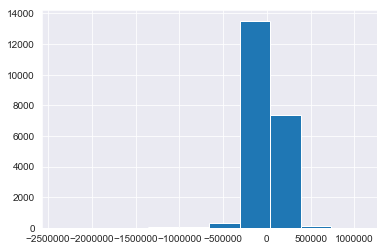

In [193]:
df_final.difference.hist()

In [225]:
# count the number of homes the model over and under estimated
under_values = df_final[df_final['difference'] < -200000]
over_values = df_final[df_final['difference'] > 200000]

print(f'The model underestimated {round(len(under_values)/len(df_final)*100,2)}% of house prices by over 200,000')
print(f'The model overestimated {round(len(over_values)/len(df_final)*100,2)} house prices by over 200,000')

The model underestimated 4.02% of house prices by over 200,000
The model overestimated 5.02 house prices by over 200,000


The model is within ~70,000 of 50% of values, with a median difference of only 1,725. Although it appears that the model drastically underestimated some of the most expensive house prices in the data. 

## Final Conclusions

Using knowledge of previous home sale prices, we have analyzed data to determine what factors have the most signifcant impact on final sale price. Perhaps not too surprisingly, location matters. With our model we can predict future prices to a degree of confidence that will allow us to budget for future purchases and move when opportunities in the market open. 

**Research Questions:** 
1. What factors contribute to predicted housing price most significantly?
    * Location contributes to home price most significantly
        * zip code effects range from -129084.89 to 1065544.82 on predicted price
        * waterfront adds up to 561669.4 to predicted price
    * The highest home grade adds up to 809462.31 to predicted price
    * Newer homes are estimated to be lower in price 
2. Given available data, to what degree of confidence can we predict housing prices?
    * This model accounts for ~81.5% of home prices analyzed
    * Early tests predict home prices within 70,000 for 50% of analyzed home sales

**Model features:** 
* This model accounts for ~81.5% of home prices analyzed 
* It includes 59 significant features, including:
    * location data: zip code, latitude, longitude, waterfront
    * home features: bedrooms, bathrooms, floors
    * home and property size figures: living space, lot space, size of nearest properties
    * market evaluations and activity: grade, condition, previous views
    * dates: year built, time of year last sold

**Model limits:**
* This analysis focused on homes with < 8000sqft living space, and < 500,000sqft lot space
* The model is less accurate with homes at the extreme ends of the price spectrum

**Recommendations:** 
* Increase robustness of model with additional date, such as school, crime, polution, and employment information
* Refine scope of the model to focus on specific price ranges or areas (e.g. homes less than $1mm, or between 1000-3000sqft)